<a href="https://colab.research.google.com/github/harrietgilmour/SIAM_FaIR/blob/main/SIAM_scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules that are needed.

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
plt.style.use('seaborn-ticks')

# BAU / 'growth-driven' scenario

In [ ]:
#creating lists of all PARAMETERS
#================================

years = list(range(1982,2101)) #list of years from 1982-2100 (1980-81 need to be calculated separately from the loop)
K_1980 = 450 #1980 total capital value (T$)
A = 0.06 #Total factor productivity (%/yr) (6%/yr)
sensitivity_GWP = 0.7 #emissions sensitivity to GWP (unitless) - 0.7 * capital^0.6
emissions_GWP_ratio = 0.6 #ratio of emissions to GWP growth
land_change_emissions = 1.5 #land use change emissions (GtC/yr)
delta_u_1980 = 250 #1980 cumulative emissions (GtC)
clim_sens = (1.1/600) #climate sensitivity (^c/GtC)
base_decay = 0.03 #base decay rate of capital (%/yr) (3%/yr)
Sd = 0.0075 #decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)
#emissions_scale = 3.793 #total global CO2 emissions in 1980 / emissions_1980

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980 = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y = A*K #GWP in 1981 (T$/yr)
u = (0.7*y**0.6) #emissions rate in 1981 (GtC/yr)
delta_u = delta_u_1980+u+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t = clim_sens*delta_u #global mean surface temp change in 1981 (^C)
d = max(0.03,0.03+Sd*(delta_t-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate = (y-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series=[] #empty list for cumulative emissions
delta_u_full_series.append(delta_u_1980) #adding the 1980 value
delta_u_full_series.append(delta_u) #adding the 1981 value
print(delta_u_full_series)

#temperature change series:
delta_t_full_series=[]
delta_t_full_series.append(delta_t_1980)
delta_t_full_series.append(delta_t)
print(delta_t_full_series)

#total capital series:
K_full_series=[]
K_full_series.append(K_1980)
K_full_series.append(K)
print(K_full_series)

#emissions series:
u_full_series=[]
u_full_series.append(u_1980)
u_full_series.append(u)
print(u_full_series)

#capital decay rate series:
d_full_series=[]
d_full_series.append(d_1980)
d_full_series.append(d)
print(d_full_series)

#GWP series:
y_full_series=[]
y_full_series.append(y_1980)
y_full_series.append(y)
print(y_full_series)

#GWP growth rate series:
y_growth_rate_series=[]
y_growth_rate_series.append(0)
y_growth_rate_series.append(y_growth_rate)
print(y_growth_rate_series)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K = K+y-d*K
  y = A*K
  u = (0.7*y**0.6)
  delta_u = delta_u+u+land_change_emissions
  delta_t = clim_sens*delta_u
  d = max(0.03,0.03+Sd*(delta_t-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series.append(delta_u) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series.append(delta_t) #adding the temp change from 1982-2100
  K_full_series.append(K) #adding 1982-2100 total capital to the list
  u_full_series.append(u) #adding 1982-2100 emissions to the list
  d_full_series.append(d) #adding 1982-2100 capital decay rate to the list
  y_full_series.append(y) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df1=pd.DataFrame()

df1['Years']=years_full
df1['capital']=K_full_series
df1['GWP']=y_full_series
df1['emissions']=u_full_series
df1['cumulative_emissions']=delta_u_full_series
df1['temp_change']=delta_t_full_series
df1['decay_rate']=d_full_series
df1['total_GWP_growth_rate']=df1['GWP'].pct_change()

In [ ]:
df1

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
...,...,...,...,...,...,...,...,...
116,2096,6770.508150,406.230489,25.725365,2110.744797,3.869699,0.051523,0.008852
117,2097,6827.903502,409.674210,25.855993,2138.100789,3.919851,0.051899,0.008477
118,2098,6883.217127,412.993028,25.981467,2165.582256,3.970234,0.052277,0.008101
119,2099,6936.377893,416.182674,26.101679,2193.183935,4.020837,0.052656,0.007723


In [ ]:
df1.to_csv('/content/drive/MyDrive/Diss_Code/BAU_data.csv')

# D2022 (100% shift from HCE to LCE in 2022)

In [ ]:
#setting out the initial values for the HCE and LCE split in 2022
#================================================================

#Capital in 2020
HCE_K_2022=df1['capital'][42]*0.8 #High Carbon Economy total capital in 2020 (T$)
LCE_K_2022=df1['capital'][42]*0.2 #Low Carbon Economy total capital in 2020 (T$)

In [ ]:
#parameters needed for GWP calculations:

A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2022=HCE_K_2022*A_HCE #High Carbon Economy GWP in 2022 (T$/yr)
LCE_GWP_2022=LCE_K_2022*A_LCE #Low Carbon Economy GWP in 2022 (T$/yr)
Total_GWP_2022=HCE_GWP_2022+LCE_GWP_2022 #Total GWP in 2022(T$/yr)

#carbon intensity parameter
HCE_C_intensity_2022=df1['emissions'][42]/HCE_GWP_2022 #carbon intensity of the High Carbon Economy in 2022 (effects the emissions rate)
u_2022=HCE_C_intensity_2022*HCE_GWP_2022 #emissions in 2022 (GtC/yr), using the carbon intensity of HCE GWP in 2022

#setting the remaining 2022 values needed
delta_u_2022=df1['cumulative_emissions'][42] #cumulative emissions in 2022 (GtC)
delta_t_2022=df1['temp_change'][42] #temperature change in 2022 (^c)
d_2022=df1['decay_rate'][42] #high carbon infrastructure decay rate in 2022(%/yr) (3.08%/yr)

In [ ]:
#2023 values for decarbonisation scenario:
#=========================================

HCE_K=HCE_K_2022-d_2022*HCE_K_2022 #High Carbon Economy capital in 2023 (T$)
LCE_K=LCE_K_2022+Total_GWP_2022-d_2022*LCE_K_2022 #Low Carbon Economy capital in 2023 (T$)

HCE_GWP=HCE_K*A_HCE #High Carbon Economy GWP in 2023 (T$/yr)
LCE_GWP=LCE_K*A_LCE #Low Carbon Economy GWP in 2023 (T$/yr)
u_decarb=HCE_C_intensity_2022*HCE_GWP #total economy emissions in 2023 (GtC/yr)
delta_u_decarb=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2023 (GtC)
delta_t_decarb=clim_sens*delta_u_decarb #total economy temp change in 2023 (^c)
d_decarb=max(0.03,0.03+Sd*(delta_t_decarb-1)) #high carbon infrastructure decay rate (%/yr) in 2023
Total_GWP=HCE_GWP+LCE_GWP #total GWP in 2023 (T$/yr)

In [ ]:
#creating the list that the 2022, 2023 and eventually 2024-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series=[] #empty list for HCE capital 
HCE_K_full_series.append(HCE_K_2022) #adding the 2022 value to the list
HCE_K_full_series.append(HCE_K) #adding the 2021 value to the list
print(HCE_K_full_series)

LCE_K_full_series=[] #empty list for LCE capital
LCE_K_full_series.append(LCE_K_2022) #adding the 2022 value to the list
LCE_K_full_series.append(LCE_K) #adding the 2021 value to the list
print(LCE_K_full_series)


#GWP series:
HCE_GWP_full_series=[] #empty list for HCE GWP
HCE_GWP_full_series.append(HCE_GWP_2022)
HCE_GWP_full_series.append(HCE_GWP)
print(HCE_GWP_full_series)

LCE_GWP_full_series=[] #empty list for LCE GWP
LCE_GWP_full_series.append(LCE_GWP_2022)
LCE_GWP_full_series.append(LCE_GWP)
print(LCE_GWP_full_series)

Total_GWP_full_series=[] #empty list for total economy GWP 
Total_GWP_full_series.append(Total_GWP_2022)
Total_GWP_full_series.append(Total_GWP)
print(Total_GWP_full_series)


#emissions series:
u_full_series_decarb=[] #empty list for total economy emissions
u_full_series_decarb.append(u_2022)
u_full_series_decarb.append(u_decarb)
print(u_full_series_decarb)


#cumulative emissions series:
delta_u_full_series_decarb=[] #empty list for cumulative emissions
delta_u_full_series_decarb.append(delta_u_2022) 
delta_u_full_series_decarb.append(delta_u_decarb)
print(delta_u_full_series_decarb)


#temperature change series:
delta_t_full_series_decarb=[] #empty list for total economy temp change 
delta_t_full_series_decarb.append(delta_t_2022)
delta_t_full_series_decarb.append(delta_t_decarb)
print(delta_t_full_series_decarb)


#high C infrastructure decay rate series:
d_full_series_decarb=[] #empty list for high C infrastructure decay rate
d_full_series_decarb.append(d_2022)
d_full_series_decarb.append(d_decarb)
print(d_full_series_decarb)

[1241.3594746119652, 1202.6555286504738]
[310.3398686529913, 393.7658427585158]
[75.23390755224031, 72.88821385760447]
[17.868053043657074, 22.67136670427818]
[93.10196059589738, 95.55958056188265]
[10.62853326286016, 10.297149658458023]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 1.1793925627912467]
[0.031178676888570022, 0.03134544422093435]


In [ ]:
#creating an array of years between 2024-2100
#============================================
years_decarb = list(range(2024,2101)) #YEARS
years_array_decarb=(np.array(years_decarb))


#go through loop for all variables to get from 2024 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2024-2100
  delta_u_decarb = delta_u_decarb+u_decarb+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K = HCE_K-d_decarb*HCE_K #HCE capital (T$)
  LCE_K = LCE_K+Total_GWP-d_decarb*LCE_K #LCE capital (T$)
  HCE_GWP = A_HCE*HCE_K #HCE GWP (T$/yr)
  LCE_GWP = A_LCE*LCE_K #LCE GWP (T$/yr)
  Total_GWP = HCE_GWP+LCE_GWP #Total economy GWP (T$/yr)
  u_decarb = HCE_C_intensity_2022*HCE_GWP #emissions from HCE sector (GtC/yr) 
  delta_t_decarb = clim_sens*delta_u_decarb # temp change (^C)
  d_decarb = max(0.03,0.03+Sd*(delta_t_decarb-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb.append(delta_u_decarb) #adding the 2024-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb.append(delta_t_decarb) #adding the temp change from 2024-2100
  HCE_K_full_series.append(HCE_K) #adding 2024-2100 HCE capital to the list
  LCE_K_full_series.append(LCE_K) #adding 2024-2100 LCE capital to the list
  HCE_GWP_full_series.append(HCE_GWP)
  LCE_GWP_full_series.append(LCE_GWP)
  Total_GWP_full_series.append(Total_GWP)
  u_full_series_decarb.append(u_decarb)
  d_full_series_decarb.append(d_decarb)

In [ ]:
years_full_decarb = list(range(2022,2101)) #creating a new years array so that 2022 and 1981 are included and x and y shapes match

In [ ]:
df2= pd.DataFrame()

df2['Years']=years_full_decarb
df2['HCE capital']=HCE_K_full_series
df2['HCE GWP']=HCE_GWP_full_series
df2['HCE GWP growth rate']=df2['HCE GWP'].pct_change()
df2['LCE capital']=LCE_K_full_series
df2['LCE GWP']=LCE_GWP_full_series
df2['LCE GWP growth rate']=df2['LCE GWP'].pct_change()
df2['emissions']=u_full_series_decarb
df2['cumulative_emissions']=delta_u_full_series_decarb
df2['temp_change']=delta_t_full_series_decarb
df2['decay_rate']=d_full_series_decarb
df2['capital']=df2['HCE capital']+df2['LCE capital']
df2['GWP']=Total_GWP_full_series
df2['total_GWP_growth_rate']=df2['GWP'].pct_change()

In [ ]:
df2

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2022,1241.359475,75.233908,NaN,310.339869,17.868053,NaN,10.628533,631.176501,1.157157,0.031179,1551.699343,93.101961,NaN
1,2023,1202.655529,72.888214,-0.031179,393.765843,22.671367,0.268821,10.297150,643.305034,1.179393,0.031345,1596.421371,95.559581,0.026397
2,2024,1164.957757,70.603500,-0.031345,476.982658,27.462638,0.211336,9.974381,655.102184,1.201021,0.031508,1641.940415,98.066138,0.026230
3,2025,1128.252670,68.378950,-0.031508,560.020191,32.243587,0.174089,9.660112,666.576565,1.222057,0.031665,1688.272861,100.622536,0.026068
4,2026,1092.526066,66.213701,-0.031665,642.909449,37.015999,0.148011,9.354220,677.736676,1.242517,0.031819,1735.435515,103.229700,0.025910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,90.935725,5.511256,-0.036703,8523.161951,490.727506,0.021558,0.778593,1035.256148,1.897970,0.036735,8614.097676,496.238762,0.020873
75,2097,87.595222,5.308801,-0.036735,8706.304302,501.272066,0.021488,0.749991,1037.534741,1.902147,0.036766,8793.899524,506.580867,0.020841
76,2098,84.374687,5.113617,-0.036766,8892.788291,512.009023,0.021419,0.722417,1039.784732,1.906272,0.036797,8977.162978,517.122640,0.020810
77,2099,81.269948,4.925451,-0.036797,9082.682644,522.942334,0.021354,0.695834,1042.007149,1.910346,0.036828,9163.952592,527.867785,0.020779


In [ ]:
#slicing the BAU dataframe to get just 1980-2021:

df3= pd.DataFrame()

df3=df1[0:42]
df3

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
5,1985,521.673333,31.300400,5.526217,284.176565,0.520990,0.030000,0.030000
6,1986,537.323533,32.239412,5.625101,291.301665,0.534053,0.030000,0.030000
7,1987,553.443239,33.206594,5.725753,298.527419,0.547300,0.030000,0.030000
8,1988,570.046537,34.202792,5.828207,305.855626,0.560735,0.030000,0.030000
9,1989,587.147933,35.228876,5.932494,313.288120,0.574362,0.030000,0.030000


In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D2022 dataframe (df2)

dfD2022 = [df3, df2]

D2022 = pd.concat(dfD2022)
display(D2022)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,8614.097676,496.238762,0.778593,1035.256148,1.897970,0.036735,0.020873,90.935725,5.511256,-0.036703,8523.161951,490.727506,0.021558
75,2097,8793.899524,506.580867,0.749991,1037.534741,1.902147,0.036766,0.020841,87.595222,5.308801,-0.036735,8706.304302,501.272066,0.021488
76,2098,8977.162978,517.122640,0.722417,1039.784732,1.906272,0.036797,0.020810,84.374687,5.113617,-0.036766,8892.788291,512.009023,0.021419
77,2099,9163.952592,527.867785,0.695834,1042.007149,1.910346,0.036828,0.020779,81.269948,4.925451,-0.036797,9082.682644,522.942334,0.021354


In [ ]:
D2022.to_csv('/content/drive/MyDrive/Diss_Code/D2022_data.csv')

In [ ]:
import io
with io.StringIO() as buffer:
  D2022['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.297149658458023
9.974380928204216
9.660111574793133
9.35422000950518
9.05657921207097
8.767057357324873
8.485518409008666
8.211822681215514
7.945827368077643
7.687387042398348
7.436354124011935
7.192579318724675


# D2030 (100% decarbonisation in 2030)

In [ ]:
#setting out the initial values for the HCE and LCE split in 2030
#================================================================

#Capital in 2030
HCE_K_2030=K_full_series[50]*0.8 #High Carbon Economy total capital in 2030 (T$)
LCE_K_2030=K_full_series[50]*0.2 #Low Carbon Economy total capital in 2030 (T$)

#parameters needed for GWP calculations:
A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2030=HCE_K_2030*A_HCE #High Carbon Economy GWP in 2030 (T$/yr)
LCE_GWP_2030=LCE_K_2030*A_LCE #Low Carbon Economy GWP in 2030 (T$/yr)
Total_GWP_2030=HCE_GWP_2030+LCE_GWP_2030 #Total GWP in 2030 (T$/yr)

#carbon intensity parameter
HCE_C_intensity_2030=u_full_series[50]/HCE_GWP_2030 #carbon intensity of the High Carbon Economy in 2030 (effects the emissions rate)
u_2030=HCE_C_intensity_2030*HCE_GWP_2030 #emissions in 2030 (GtC/yr), using the carbon intensity of HCE GWP in 2030

#setting the remaining 2030 values needed
delta_u_2030=delta_u_full_series[50] #cumulative emissions in 2030 (GtC)
delta_t_2030=delta_t_full_series[50] #temperature change in 2030 (^c)
d_2030=d_full_series[50] #high carbon infrastructure decay rate in 2020(%/yr) (3.08%/yr)

In [ ]:
#2031 values for decarbonisation scenario:
#=========================================

HCE_K_10years=HCE_K_2030-d_2030*HCE_K_2030 #High Carbon Economy capital in 2031 (T$)
LCE_K_10years=LCE_K_2030+Total_GWP_2030-d_2030*LCE_K_2030 #Low Carbon Economy capital in 2031 (T$)

HCE_GWP_10years=HCE_K_10years*A_HCE #High Carbon Economy GWP in 2031 (T$/yr)
LCE_GWP_10years=LCE_K_10years*A_LCE #Low Carbon Economy GWP in 2031 (T$/yr)
u_decarb_10years=HCE_C_intensity_2030*HCE_GWP_10years #total economy emissions in 2031 (GtC/yr)
delta_u_decarb_10years=delta_u_2030+u_2030+land_change_emissions #total economy cumulative emissions in 2031 (GtC)
delta_t_decarb_10years=clim_sens*delta_u_decarb_10years #total economy temp change in 2031 (^c)
d_decarb_10years=max(0.03,0.03+Sd*(delta_t_decarb_10years-1)) #high carbon infrastructure decay rate (%/yr) in 2031
Total_GWP_10years=HCE_GWP_10years+LCE_GWP_10years #total GWP in 2031 (T$/yr)

In [ ]:
#creating the list that the 2030, 2031 and eventually 2032-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_10years=[] #empty list for HCE capital 
HCE_K_full_series_10years.append(HCE_K_2030) #adding the 2020 value to the list
HCE_K_full_series_10years.append(HCE_K_10years) #adding the 2021 value to the list
print(HCE_K_full_series_10years)

LCE_K_full_series_10years=[] #empty list for LCE capital
LCE_K_full_series_10years.append(LCE_K_2030) #adding the 2020 value to the list
LCE_K_full_series_10years.append(LCE_K_10years) #adding the 2021 value to the list
print(LCE_K_full_series_10years)


#GWP series:
HCE_GWP_full_series_10years=[] #empty list for HCE GWP
HCE_GWP_full_series_10years.append(HCE_GWP_2030)
HCE_GWP_full_series_10years.append(HCE_GWP_10years)
print(HCE_GWP_full_series_10years)

LCE_GWP_full_series_10years=[] #empty list for LCE GWP
LCE_GWP_full_series_10years.append(LCE_GWP_2030)
LCE_GWP_full_series_10years.append(LCE_GWP_10years)
print(LCE_GWP_full_series_10years)

Total_GWP_full_series_10years=[] #empty list for total economy GWP 
Total_GWP_full_series_10years.append(Total_GWP_2030)
Total_GWP_full_series_10years.append(Total_GWP_10years)
print(Total_GWP_full_series_10years)


#emissions series:
u_full_series_decarb_10years=[] #empty list for total economy emissions
u_full_series_decarb_10years.append(u_2030)
u_full_series_decarb_10years.append(u_decarb_10years)
print(u_full_series_decarb_10years)


#cumulative emissions series:
delta_u_full_series_decarb_10years=[] #empty list for cumulative emissions
delta_u_full_series_decarb_10years.append(delta_u_2030) 
delta_u_full_series_decarb_10years.append(delta_u_decarb_10years)
print(delta_u_full_series_decarb_10years)


#temperature change series:
delta_t_full_series_decarb_10years=[] #empty list for total economy temp change 
delta_t_full_series_decarb_10years.append(delta_t_2030)
delta_t_full_series_decarb_10years.append(delta_t_decarb_10years)
print(delta_t_full_series_decarb_10years)


#high C infrastructure decay rate series:
d_full_series_decarb_10years=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_10years.append(d_2030)
d_full_series_decarb_10years.append(d_decarb_10years)
print(d_full_series_decarb_10years)

[1550.7958209148924, 1500.2311654106377]
[387.6989552287231, 491.36747792127636]
[93.98762550999348, 90.92310093397805]
[22.32206105862345, 28.29085478940682]
[116.30968656861693, 119.21395572338487]
[12.146959157915097, 11.750900052673328]
[734.9540068893767, 748.6009660472919]
[1.3474156792971907, 1.3724351044200351]
[0.03260561759472893, 0.03279326328315026]


In [ ]:
#creating an array of years between 2032-2100
#============================================
years_decarb_10years = list(range(2032,2101)) #YEARS
years_array_decarb_10years=(np.array(years_decarb_10years))


#go through loop for all variables to get from 2032 to 2100
#==========================================================
for x in range(0,years_array_decarb_10years.size): #loop for the number of years between 2022-2100
  delta_u_decarb_10years = delta_u_decarb_10years+u_decarb_10years+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_10years = HCE_K_10years-d_decarb_10years*HCE_K_10years #HCE capital (T$)
  LCE_K_10years = LCE_K_10years+Total_GWP_10years-d_decarb_10years*LCE_K_10years #LCE capital (T$)
  HCE_GWP_10years = A_HCE*HCE_K_10years #HCE GWP (T$/yr)
  LCE_GWP_10years = A_LCE*LCE_K_10years #LCE GWP (T$/yr)
  Total_GWP_10years = HCE_GWP_10years+LCE_GWP_10years #Total economy GWP (T$/yr)
  u_decarb_10years = HCE_C_intensity_2030*HCE_GWP_10years #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_10years = clim_sens*delta_u_decarb_10years # temp change (^C)
  d_decarb_10years = max(0.03,0.03+Sd*(delta_t_decarb_10years-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_10years.append(delta_u_decarb_10years) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_10years.append(delta_t_decarb_10years) #adding the temp change from 2022-2100
  HCE_K_full_series_10years.append(HCE_K_10years) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_10years.append(LCE_K_10years) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_10years.append(HCE_GWP_10years)
  LCE_GWP_full_series_10years.append(LCE_GWP_10years)
  Total_GWP_full_series_10years.append(Total_GWP_10years)
  u_full_series_decarb_10years.append(u_decarb_10years)
  d_full_series_decarb_10years.append(d_decarb_10years)

print(delta_u_full_series_decarb_10years)
print(delta_t_full_series_decarb_10years)
print(HCE_K_full_series_10years)
print(LCE_K_full_series_10years)
print(HCE_GWP_full_series_10years)
print(LCE_GWP_full_series_10years)
print(Total_GWP_full_series_10years)
print(u_full_series_decarb_10years)
print(d_full_series_decarb_10years)

[734.9540068893767, 748.6009660472919, 761.8518660999652, 774.7174157933972, 787.2081812216331, 799.3345767886191, 811.1068571543485, 822.5351101147655, 833.6292503653066, 844.3990140986082, 854.8539543877697, 865.0034373075923, 874.8566387474043, 884.4225418703986, 893.7099351758242, 902.7274111218788, 911.4833652687164, 919.9859959025949, 928.2433041038425, 936.2630942229788, 944.0529747310036, 951.6203594115302, 958.9724688640932, 966.1163322895908, 973.0587895304224, 979.806493339448, 986.3659118534225, 992.7433312480356, 998.9448585531258, 1004.9764246080177, 1010.8437871382635, 1016.5525339363452, 1022.1080861301235, 1027.5157015239793, 1032.7804779987146, 1037.907356957336, 1042.9011268048514, 1047.766426451159, 1052.5077488270188, 1057.129444403934, 1061.6357247095862, 1066.0306658312093, 1070.3182119000057, 1074.5021785503675, 1078.5862563482885, 1082.5740141839344, 1086.4689026238818, 1090.2742572190411, 1093.9933017647484, 1097.6291515099497, 1101.1848163128052, 1104.6632037

In [ ]:
years_full_decarb_2030 = list(range(2030,2101))

In [ ]:
df4= pd.DataFrame()

df4['Years']=years_full_decarb_2030
df4['HCE capital']=HCE_K_full_series_10years
df4['HCE GWP']=HCE_GWP_full_series_10years
df4['HCE GWP growth rate']=df4['HCE GWP'].pct_change()
df4['LCE capital']=LCE_K_full_series_10years
df4['LCE GWP']=LCE_GWP_full_series_10years
df4['LCE GWP growth rate']=df4['LCE GWP'].pct_change()
df4['emissions']=u_full_series_decarb_10years
df4['cumulative_emissions']=delta_u_full_series_decarb_10years
df4['temp_change']=delta_t_full_series_decarb_10years
df4['decay_rate']=d_full_series_decarb_10years
df4['capital']=df4['HCE capital']+df4['LCE capital']
df4['GWP']=Total_GWP_full_series_10years
df4['total_GWP_growth_rate']=df4['GWP'].pct_change()

In [ ]:
df4

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2030,1550.795821,93.987626,NaN,387.698955,22.322061,NaN,12.146959,734.954007,1.347416,0.032606,1938.494776,116.309687,NaN
1,2031,1500.231165,90.923101,-0.032606,491.367478,28.290855,0.267394,11.750900,748.600966,1.372435,0.032793,1991.598643,119.213956,0.024970
2,2032,1451.033690,87.941436,-0.032793,594.467891,34.226939,0.209823,11.365550,761.851866,1.396728,0.032975,2045.501580,122.168375,0.024782
3,2033,1403.185182,85.041526,-0.032975,697.033411,40.132227,0.172533,10.990765,774.717416,1.420315,0.033152,2100.218593,125.173753,0.024600
4,2034,1356.666275,82.222199,-0.033152,799.098859,46.008722,0.146428,10.626396,787.208181,1.443215,0.033324,2155.765134,128.230921,0.024423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2096,135.965907,8.240358,-0.038267,8011.008179,461.239865,0.020401,1.064984,1149.263574,2.106983,0.038302,8146.974086,469.480223,0.019309
67,2097,130.758090,7.924733,-0.038302,8173.647769,470.603962,0.020302,1.024192,1151.828558,2.111686,0.038338,8304.405859,478.528695,0.019273
68,2098,125.745133,7.620917,-0.038338,8338.818077,480.113768,0.020208,0.984927,1154.352750,2.116313,0.038372,8464.563210,487.734685,0.019238
69,2099,120.919997,7.328485,-0.038372,8506.572714,489.772368,0.020117,0.947133,1156.837677,2.120869,0.038407,8627.492711,497.100853,0.019203


In [ ]:
#slicing the BAU dataframe to get just 1980-2029:

df5= pd.DataFrame()

df5=df1[0:50]
df5

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
5,1985,521.673333,31.300400,5.526217,284.176565,0.520990,0.030000,0.030000
6,1986,537.323533,32.239412,5.625101,291.301665,0.534053,0.030000,0.030000
7,1987,553.443239,33.206594,5.725753,298.527419,0.547300,0.030000,0.030000
8,1988,570.046537,34.202792,5.828207,305.855626,0.560735,0.030000,0.030000
9,1989,587.147933,35.228876,5.932494,313.288120,0.574362,0.030000,0.030000


In [ ]:
#combining the BAU 1980-2029 dataframe (df4) with the D2030 dataframe (df5)

dfD2030 = [df5, df4]

D2030 = pd.concat(dfD2030)
display(D2030)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2096,8146.974086,469.480223,1.064984,1149.263574,2.106983,0.038302,0.019309,135.965907,8.240358,-0.038267,8011.008179,461.239865,0.020401
67,2097,8304.405859,478.528695,1.024192,1151.828558,2.111686,0.038338,0.019273,130.758090,7.924733,-0.038302,8173.647769,470.603962,0.020302
68,2098,8464.563210,487.734685,0.984927,1154.352750,2.116313,0.038372,0.019238,125.745133,7.620917,-0.038338,8338.818077,480.113768,0.020208
69,2099,8627.492711,497.100853,0.947133,1156.837677,2.120869,0.038407,0.019203,120.919997,7.328485,-0.038372,8506.572714,489.772368,0.020117


In [ ]:
import io
with io.StringIO() as buffer:
  D2030['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.81128485086441
10.996093040769257
11.182939425680226
11.371803630011701
11.562663254482665
11.75549382152361
11.950268721218931
12.146959157915097
11.750900052673328
11.365549693432028
10.990765428235902
10.62639

# D2040 (100% decarbonisation in 2040)

In [ ]:
#setting out the initial values for the HCE and LCE split in 2040
#================================================================

#Capital in 2040
HCE_K_2040=K_full_series[60]*0.8 #High Carbon Economy total capital in 2040 (T$)
LCE_K_2040=K_full_series[60]*0.2 #Low Carbon Economy total capital in 2040 (T$)

#parameters needed for GWP calculations:
A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2040=HCE_K_2040*A_HCE #High Carbon Economy GWP in 2040 (T$/yr)
LCE_GWP_2040=LCE_K_2040*A_LCE #Low Carbon Economy GWP in 2040 (T$/yr)
Total_GWP_2040=HCE_GWP_2040+LCE_GWP_2040 #Total GWP in 2040 (T$/yr)

#carbon intensity parameter
HCE_C_intensity_2040=u_full_series[60]/HCE_GWP_2040 #carbon intensity of the High Carbon Economy in 2040 (effects the emissions rate)
u_2040=HCE_C_intensity_2040*HCE_GWP_2040 #emissions in 2040 (GtC/yr), using the carbon intensity of HCE GWP in 2040

#setting the remaining 2040 values needed
delta_u_2040=delta_u_full_series[60] #cumulative emissions in 2040 (GtC)
delta_t_2040=delta_t_full_series[60] #temperature change in 2040 (^c)
d_2040=d_full_series[60] #high carbon infrastructure decay rate in 2040(%/yr) (3.08%/yr)

In [ ]:
#2041 values for decarbonisation scenario:
#=========================================

HCE_K_20years=HCE_K_2040-d_2040*HCE_K_2040 #High Carbon Economy capital in 2021 (T$)
LCE_K_20years=LCE_K_2040+Total_GWP_2040-d_2040*LCE_K_2040 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP_20years=HCE_K_20years*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_20years=LCE_K_20years*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb_20years=HCE_C_intensity_2040*HCE_GWP_20years #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_20years=delta_u_2040+u_2040+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_20years=clim_sens*delta_u_decarb_20years #total economy temp change in 2021 (^c)
d_decarb_20years=max(0.03,0.03+Sd*(delta_t_decarb_20years-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_20years=HCE_GWP_20years+LCE_GWP_20years #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2040, 2041 and eventually 2042-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_20years=[] #empty list for HCE capital 
HCE_K_full_series_20years.append(HCE_K_2040) #adding the 2020 value to the list
HCE_K_full_series_20years.append(HCE_K_20years) #adding the 2021 value to the list
print(HCE_K_full_series_20years)

LCE_K_full_series_20years=[] #empty list for LCE capital
LCE_K_full_series_20years.append(LCE_K_2040) #adding the 2020 value to the list
LCE_K_full_series_20years.append(LCE_K_20years) #adding the 2021 value to the list
print(LCE_K_full_series_20years)


#GWP series:
HCE_GWP_full_series_20years=[] #empty list for HCE GWP
HCE_GWP_full_series_20years.append(HCE_GWP_2040)
HCE_GWP_full_series_20years.append(HCE_GWP_20years)
print(HCE_GWP_full_series_20years)

LCE_GWP_full_series_20years=[] #empty list for LCE GWP
LCE_GWP_full_series_20years.append(LCE_GWP_2040)
LCE_GWP_full_series_20years.append(LCE_GWP_20years)
print(LCE_GWP_full_series_20years)

Total_GWP_full_series_20years=[] #empty list for total economy GWP 
Total_GWP_full_series_20years.append(Total_GWP_2040)
Total_GWP_full_series_20years.append(Total_GWP_20years)
print(Total_GWP_full_series_20years)


#emissions series:
u_full_series_decarb_20years=[] #empty list for total economy emissions
u_full_series_decarb_20years.append(u_2040)
u_full_series_decarb_20years.append(u_decarb_20years)
print(u_full_series_decarb_20years)


#cumulative emissions series:
delta_u_full_series_decarb_20years=[] #empty list for cumulative emissions
delta_u_full_series_decarb_20years.append(delta_u_2040) 
delta_u_full_series_decarb_20years.append(delta_u_decarb_20years)
print(delta_u_full_series_decarb_20years)


#temperature change series:
delta_t_full_series_decarb_20years=[] #empty list for total economy temp change 
delta_t_full_series_decarb_20years.append(delta_t_2040)
delta_t_full_series_decarb_20years.append(delta_t_decarb_20years)
print(delta_t_full_series_decarb_20years)


#high C infrastructure decay rate series:
d_full_series_decarb_20years=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_20years.append(d_2040)
d_full_series_decarb_20years.append(d_decarb_20years)
print(d_full_series_decarb_20years)

[2014.470229882346, 1944.6964964354318]
[503.6175574705865, 637.2593913500339]
[122.08910484135431, 117.86039372335951]
[28.996162399821646, 36.69069222924437]
[151.08526724117596, 154.55108595260387]
[14.211218284711565, 13.718994700642371]
[882.6377697232357, 898.3489880079472]
[1.618169244492599, 1.6469731446812368]
[0.03463626933369449, 0.03485229858510928]


In [ ]:
#creating an array of years between 2042-2100
#============================================
years_decarb_20years = list(range(2042,2101)) #YEARS
years_array_decarb_20years=(np.array(years_decarb_20years))


#go through loop for all variables to get from 2042 to 2100
#==========================================================
for x in range(0,years_array_decarb_20years.size): #loop for the number of years between 2022-2100
  delta_u_decarb_20years = delta_u_decarb_20years+u_decarb_20years+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_20years = HCE_K_20years-d_decarb_20years*HCE_K_20years #HCE capital (T$)
  LCE_K_20years = LCE_K_20years+Total_GWP_20years-d_decarb_20years*LCE_K_20years #LCE capital (T$)
  HCE_GWP_20years = A_HCE*HCE_K_20years #HCE GWP (T$/yr)
  LCE_GWP_20years = A_LCE*LCE_K_20years #LCE GWP (T$/yr)
  Total_GWP_20years = HCE_GWP_20years+LCE_GWP_20years #Total economy GWP (T$/yr)
  u_decarb_20years = HCE_C_intensity_2040*HCE_GWP_20years #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_20years = clim_sens*delta_u_decarb_20years # temp change (^C)
  d_decarb_20years = max(0.03,0.03+Sd*(delta_t_decarb_20years-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_20years.append(delta_u_decarb_20years) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_20years.append(delta_t_decarb_20years) #adding the temp change from 2022-2100
  HCE_K_full_series_20years.append(HCE_K_20years) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_20years.append(LCE_K_20years) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_20years.append(HCE_GWP_20years)
  LCE_GWP_full_series_20years.append(LCE_GWP_20years)
  Total_GWP_full_series_20years.append(Total_GWP_20years)
  u_full_series_decarb_20years.append(u_decarb_20years)
  d_full_series_decarb_20years.append(d_decarb_20years)

print(delta_u_full_series_decarb_20years)
print(delta_t_full_series_decarb_20years)
print(HCE_K_full_series_20years)
print(LCE_K_full_series_20years)
print(HCE_GWP_full_series_20years)
print(LCE_GWP_full_series_20years)
print(Total_GWP_full_series_20years)
print(u_full_series_decarb_20years)
print(d_full_series_decarb_20years)

[882.6377697232357, 898.3489880079472, 913.5679827085896, 928.3088389096376, 942.5854500396894, 956.4115036049691, 969.8004685322582, 982.765584034875, 995.3198499158725, 1007.4760182236591, 1019.2465861767098, 1030.643790275856, 1041.6796015247737, 1052.3657216816678, 1062.7135804677437, 1072.7343336608026, 1082.438862005174, 1091.8377708721578, 1100.9413906081647, 1109.7597775107936, 1118.3027153761266, 1126.5797175635607, 1134.6000295274882, 1142.3726317680796, 1149.9062431563061, 1157.2093245911387, 1164.2900829495802, 1171.1564752928098, 1177.8162132942532, 1184.27676785781, 1190.5453738967983, 1196.6290352463877, 1202.5345296844014, 1208.2684140373715, 1213.837029350624, 1219.2465061029654, 1224.5027694482276, 1229.6115444675254, 1234.578361417564, 1239.4085609617425, 1244.1072993721007, 1248.6795536913874, 1253.130126845658, 1257.4636526988781, 1261.6846010419877, 1265.7972825097952, 1269.8058534199158, 1273.7143205287448, 1277.5265457001774, 1281.246250483447, 1284.877020597059

In [ ]:
years_full_decarb_2040 = list(range(2040,2101))

In [ ]:
df6= pd.DataFrame()

df6['Years']=years_full_decarb_2040
df6['HCE capital']=HCE_K_full_series_20years
df6['HCE GWP']=HCE_GWP_full_series_20years
df6['HCE GWP growth rate']=df6['HCE GWP'].pct_change()
df6['LCE capital']=LCE_K_full_series_20years
df6['LCE GWP']=LCE_GWP_full_series_20years
df6['LCE GWP growth rate']=df6['LCE GWP'].pct_change()
df6['emissions']=u_full_series_decarb_20years
df6['cumulative_emissions']=delta_u_full_series_decarb_20years
df6['temp_change']=delta_t_full_series_decarb_20years
df6['decay_rate']=d_full_series_decarb_20years
df6['capital']=df6['HCE capital']+df6['LCE capital']
df6['GWP']=Total_GWP_full_series_20years
df6['total_GWP_growth_rate']=df6['GWP'].pct_change()

df6

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2040,2014.470230,122.089105,NaN,503.617557,28.996162,NaN,14.211218,882.637770,1.618169,0.034636,2518.087787,151.085267,NaN
1,2041,1944.696496,117.860394,-0.034636,637.259391,36.690692,0.265364,13.718995,898.348988,1.646973,0.034852,2581.955888,154.551086,0.022939
2,2042,1876.919353,113.752688,-0.034852,769.600523,44.310333,0.207672,13.240856,913.567983,1.674875,0.035062,2646.519876,158.063021,0.022723
3,2043,1811.111633,109.764341,-0.035062,900.680149,51.857342,0.170322,12.776611,928.308839,1.701900,0.035264,2711.791783,161.621683,0.022514
4,2044,1747.244146,105.893585,-0.035264,1030.540026,59.334123,0.144180,12.326054,942.585450,1.728073,0.035461,2777.784172,165.227707,0.022312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2096,226.536053,13.729458,-0.040400,7418.114356,427.103554,0.019141,1.598114,1304.978784,2.392461,0.040443,7644.650408,440.833012,0.017176
57,2097,217.374151,13.174191,-0.040443,7558.933169,435.211304,0.018983,1.533481,1308.076898,2.398141,0.040486,7776.307320,448.385495,0.017132
58,2098,208.573529,12.640820,-0.040486,7701.287262,443.407448,0.018833,1.471396,1311.110379,2.403702,0.040528,7909.860791,456.048268,0.017090
59,2099,200.120509,12.128516,-0.040528,7845.219549,451.694459,0.018689,1.411764,1314.081775,2.409150,0.040569,8045.340058,463.822975,0.017048


In [ ]:
#slicing the BAU dataframe to get just 1980-2039:

df7= pd.DataFrame()

df7=df1[0:60]
df7

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
5,1985,521.673333,31.300400,5.526217,284.176565,0.520990,0.030000,0.030000
6,1986,537.323533,32.239412,5.625101,291.301665,0.534053,0.030000,0.030000
7,1987,553.443239,33.206594,5.725753,298.527419,0.547300,0.030000,0.030000
8,1988,570.046537,34.202792,5.828207,305.855626,0.560735,0.030000,0.030000
9,1989,587.147933,35.228876,5.932494,313.288120,0.574362,0.030000,0.030000


In [ ]:
#combining the BAU 1980-2039 dataframe (df7) with the D2040 dataframe (df6)

dfD2040 = [df7, df6]

D2040 = pd.concat(dfD2040)
display(D2040)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2096,7644.650408,440.833012,1.598114,1304.978784,2.392461,0.040443,0.017176,226.536053,13.729458,-0.040400,7418.114356,427.103554,0.019141
57,2097,7776.307320,448.385495,1.533481,1308.076898,2.398141,0.040486,0.017132,217.374151,13.174191,-0.040443,7558.933169,435.211304,0.018983
58,2098,7909.860791,456.048268,1.471396,1311.110379,2.403702,0.040528,0.017090,208.573529,12.640820,-0.040486,7701.287262,443.407448,0.018833
59,2099,8045.340058,463.822975,1.411764,1314.081775,2.409150,0.040569,0.017048,200.120509,12.128516,-0.040528,7845.219549,451.694459,0.018689


In [ ]:
import io
with io.StringIO() as buffer:
  D2040['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.81128485086441
10.996093040769257
11.182939425680226
11.371803630011701
11.562663254482665
11.75549382152361
11.950268721218931
12.146959157915097
12.345534097630608
12.545960216409606
12.748201849766593
12.95222

# D2050 (100% decarbonisation in 2050)

In [ ]:
#setting out the initial values for the HCE and LCE split in 2050
#================================================================

#Capital in 2050
HCE_K_2050=K_full_series[70]*0.8 #High Carbon Economy total capital in 2050 (T$)
LCE_K_2050=K_full_series[70]*0.2 #Low Carbon Economy total capital in 2050 (T$)

#parameters needed for GWP calculations:
A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2050=HCE_K_2050*A_HCE #High Carbon Economy GWP in 2050 (T$/yr)
LCE_GWP_2050=LCE_K_2050*A_LCE #Low Carbon Economy GWP in 2050 (T$/yr)
Total_GWP_2050=HCE_GWP_2050+LCE_GWP_2050 #Total GWP in 2050 (T$/yr)

#carbon intensity parameter
HCE_C_intensity_2050=u_full_series[70]/HCE_GWP_2050 #carbon intensity of the High Carbon Economy in 2050 (effects the emissions rate)
u_2050=HCE_C_intensity_2050*HCE_GWP_2050 #emissions in 2050 (GtC/yr), using the carbon intensity of HCE GWP in 2050

#setting the remaining 2050 values needed
delta_u_2050=delta_u_full_series[70] #cumulative emissions in 2050 (GtC)
delta_t_2050=delta_t_full_series[70] #temperature change in 2050 (^c)
d_2050=d_full_series[70] #high carbon infrastructure decay rate in 2050(%/yr) (3.08%/yr)

In [ ]:
#2051 values for decarbonisation scenario:
#=========================================

HCE_K_30years=HCE_K_2050-d_2050*HCE_K_2050 #High Carbon Economy capital in 2051 (T$)
LCE_K_30years=LCE_K_2050+Total_GWP_2050-d_2050*LCE_K_2050 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP_30years=HCE_K_30years*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_30years=LCE_K_30years*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb_30years=HCE_C_intensity_2050*HCE_GWP_30years #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_30years=delta_u_2050+u_2050+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_30years=clim_sens*delta_u_decarb_30years #total economy temp change in 2021 (^c)
d_decarb_30years=max(0.03,0.03+Sd*(delta_t_decarb_30years-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_30years=HCE_GWP_30years+LCE_GWP_30years #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2050, 2051 and eventually 2052-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_30years=[] #empty list for HCE capital 
HCE_K_full_series_30years.append(HCE_K_2050) #adding the 2020 value to the list
HCE_K_full_series_30years.append(HCE_K_30years) #adding the 2021 value to the list
print(HCE_K_full_series_30years)

LCE_K_full_series_30years=[] #empty list for LCE capital
LCE_K_full_series_30years.append(LCE_K_2050) #adding the 2020 value to the list
LCE_K_full_series_30years.append(LCE_K_30years) #adding the 2021 value to the list
print(LCE_K_full_series_30years)


#GWP series:
HCE_GWP_full_series_30years=[] #empty list for HCE GWP
HCE_GWP_full_series_30years.append(HCE_GWP_2050)
HCE_GWP_full_series_30years.append(HCE_GWP_30years)
print(HCE_GWP_full_series_30years)

LCE_GWP_full_series_30years=[] #empty list for LCE GWP
LCE_GWP_full_series_30years.append(LCE_GWP_2050)
LCE_GWP_full_series_30years.append(LCE_GWP_30years)
print(LCE_GWP_full_series_30years)

Total_GWP_full_series_30years=[] #empty list for total economy GWP 
Total_GWP_full_series_30years.append(Total_GWP_2050)
Total_GWP_full_series_30years.append(Total_GWP_30years)
print(Total_GWP_full_series_30years)


#emissions series:
u_full_series_decarb_30years=[] #empty list for total economy emissions
u_full_series_decarb_30years.append(u_2050)
u_full_series_decarb_30years.append(u_decarb_30years)
print(u_full_series_decarb_30years)


#cumulative emissions series:
delta_u_full_series_decarb_30years=[] #empty list for cumulative emissions
delta_u_full_series_decarb_30years.append(delta_u_2050) 
delta_u_full_series_decarb_30years.append(delta_u_decarb_30years)
print(delta_u_full_series_decarb_30years)


#temperature change series:
delta_t_full_series_decarb_30years=[] #empty list for total economy temp change 
delta_t_full_series_decarb_30years.append(delta_t_2050)
delta_t_full_series_decarb_30years.append(delta_t_decarb_30years)
print(delta_t_full_series_decarb_30years)


#high C infrastructure decay rate series:
d_full_series_decarb_30years=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_30years.append(d_2050)
d_full_series_decarb_30years.append(d_decarb_30years)
print(d_full_series_decarb_30years)

[2562.1854423594814, 2467.4816018593247]
[640.5463605898703, 809.0343086417922]
[155.28396620360493, 149.54433950662573]
[36.87994197335617, 46.580763224830456]
[192.16390817696112, 196.1251027314562]
[16.41727729380727, 15.810459697947465]
[1051.7915309034097, 1069.708808197217]
[1.9282844733229179, 1.9611328150282312]
[0.03696213354992188, 0.037208496112711736]


In [ ]:
#creating an array of years between 2052-2100
#============================================
years_decarb_30years = list(range(2052,2101)) #YEARS
years_array_decarb_30years=(np.array(years_decarb_30years))


#go through loop for all variables to get from 2052 to 2100
#==========================================================
for x in range(0,years_array_decarb_30years.size): #loop for the number of years between 2022-2100
  delta_u_decarb_30years = delta_u_decarb_30years+u_decarb_30years+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_30years = HCE_K_30years-d_decarb_30years*HCE_K_30years #HCE capital (T$)
  LCE_K_30years = LCE_K_30years+Total_GWP_30years-d_decarb_30years*LCE_K_30years #LCE capital (T$)
  HCE_GWP_30years = A_HCE*HCE_K_30years #HCE GWP (T$/yr)
  LCE_GWP_30years = A_LCE*LCE_K_30years #LCE GWP (T$/yr)
  Total_GWP_30years = HCE_GWP_30years+LCE_GWP_30years #Total economy GWP (T$/yr)
  u_decarb_30years = HCE_C_intensity_2050*HCE_GWP_30years #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_30years = clim_sens*delta_u_decarb_30years # temp change (^C)
  d_decarb_30years = max(0.03,0.03+Sd*(delta_t_decarb_30years-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_30years.append(delta_u_decarb_30years) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_30years.append(delta_t_decarb_30years) #adding the temp change from 2022-2100
  HCE_K_full_series_30years.append(HCE_K_30years) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_30years.append(LCE_K_30years) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_30years.append(HCE_GWP_30years)
  LCE_GWP_full_series_30years.append(LCE_GWP_30years)
  Total_GWP_full_series_30years.append(Total_GWP_30years)
  u_full_series_decarb_30years.append(u_decarb_30years)
  d_full_series_decarb_30years.append(d_decarb_30years)

print(delta_u_full_series_decarb_30years)
print(delta_t_full_series_decarb_30years)
print(HCE_K_full_series_30years)
print(LCE_K_full_series_30years)
print(HCE_GWP_full_series_30years)
print(LCE_GWP_full_series_30years)
print(Total_GWP_full_series_30years)
print(u_full_series_decarb_30years)
print(d_full_series_decarb_30years)

[1051.7915309034097, 1069.708808197217, 1087.0192678951644, 1103.7414441649005, 1119.8936029836307, 1135.4937205485871, 1150.5594642857252, 1165.1081763073914, 1179.1568591707628, 1192.7221637908758, 1205.8203793649004, 1218.4674251678455, 1230.6788440839894, 1242.4697977429034, 1253.8550631338817, 1264.8490305778123, 1275.4657029409584, 1285.7186959806752, 1295.62123971872, 1305.186180743464, 1314.4259853479314, 1323.3527434161413, 1331.9781729756799, 1340.3136253397388, 1348.3700907670257, 1356.1582045729374, 1363.6882536301966, 1370.9701832017515, 1378.0136040531459, 1384.8277997957562, 1391.4217344162737, 1397.8040599515782, 1403.983124271704, 1409.9669789369545, 1415.7633870983636, 1421.3798314136511, 1426.8235219535788, 1432.1014040761797, 1437.2201662487314, 1442.186247799561, 1447.0058465838347, 1451.6849265493825, 1456.229225190373, 1460.6442608782668, 1464.9353400609668, 1469.1075643224453, 1473.165837296379, 1477.1148714284573, 1480.9591945830696, 1484.7031564910203, 1488.35

In [ ]:
years_full_decarb_2050 = list(range(2050,2101))

In [ ]:
df8= pd.DataFrame()

df8['Years']=years_full_decarb_2050
df8['HCE capital']=HCE_K_full_series_30years
df8['HCE GWP']=HCE_GWP_full_series_30years
df8['HCE GWP growth rate']=df8['HCE GWP'].pct_change()
df8['LCE capital']=LCE_K_full_series_30years
df8['LCE GWP']=LCE_GWP_full_series_30years
df8['LCE GWP growth rate']=df8['LCE GWP'].pct_change()
df8['emissions']=u_full_series_decarb_30years
df8['cumulative_emissions']=delta_u_full_series_decarb_30years
df8['temp_change']=delta_t_full_series_decarb_30years
df8['decay_rate']=d_full_series_decarb_30years
df8['capital']=df8['HCE capital']+df8['LCE capital']
df8['GWP']=Total_GWP_full_series_30years
df8['total_GWP_growth_rate']=df8['GWP'].pct_change()

df8

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2050,2562.185442,155.283966,NaN,640.546361,36.879942,NaN,16.417277,1051.791531,1.928284,0.036962,3202.731803,192.163908,NaN
1,2051,2467.481602,149.544340,-0.036962,809.034309,46.580763,0.263038,15.810460,1069.708808,1.961133,0.037208,3276.515911,196.125103,0.020614
2,2052,2375.670322,143.980020,-0.037208,975.056461,56.139614,0.205210,15.222176,1087.019268,1.992869,0.037447,3350.726784,200.119634,0.020367
3,2053,2286.709748,138.588470,-0.037447,1138.663629,65.559421,0.167793,14.652159,1103.741444,2.023526,0.037676,3425.373377,204.147891,0.020129
4,2054,2200.554654,133.366949,-0.037676,1299.910722,74.843345,0.141611,14.100118,1119.893603,2.053138,0.037899,3500.465377,208.210293,0.019899
5,2055,2117.156852,128.312537,-0.037899,1458.856301,83.994757,0.122274,13.565744,1135.493721,2.081738,0.038113,3576.013153,212.307293,0.019677
6,2056,2036.465571,123.422156,-0.038113,1615.562148,93.017215,0.107417,13.048712,1150.559464,2.109359,0.038320,3652.027719,216.439370,0.019463
7,2057,1958.427818,118.692595,-0.038320,1770.092865,101.914438,0.095651,12.548683,1165.108176,2.136032,0.038520,3728.520684,220.607033,0.019256
8,2058,1882.988714,114.120528,-0.038520,1922.515501,110.690286,0.086110,12.065305,1179.156859,2.161788,0.038713,3805.504214,224.810815,0.019056
9,2059,1810.091806,109.702534,-0.038713,2072.899190,119.348741,0.078222,11.598216,1192.722164,2.186657,0.038900,3882.990996,229.051275,0.018862


In [ ]:
#slicing the BAU dataframe to get just 1980-2049:

df9= pd.DataFrame()

df9=df1[0:70]
df9

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
...,...,...,...,...,...,...,...,...
65,2045,2847.869858,170.872191,15.300333,964.448336,1.768155,0.035761,0.024470
66,2046,2916.898907,175.013934,15.521783,981.470119,1.799362,0.035995,0.024239
67,2047,2986.918441,179.215106,15.744280,998.714399,1.830976,0.036232,0.024005
68,2048,3057.910553,183.474633,15.967748,1016.182147,1.863001,0.036473,0.023768


In [ ]:
#combining the BAU 1980-2049 dataframe (df9) with the D2050 dataframe (df8)

dfD2050 = [df9, df8]

D2050 = pd.concat(dfD2050)
display(D2050)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2096,7246.489418,418.380336,2.449034,1473.165837,2.700804,0.042756,0.014876,382.211952,23.164361,-0.042700,6864.277466,395.215975,0.018466
47,2097,7355.038633,424.580619,2.344323,1477.114871,2.708044,0.042810,0.014820,365.870086,22.173945,-0.042756,6989.168547,402.406674,0.018194
48,2098,7464.747624,430.849733,2.243962,1480.959195,2.715092,0.042863,0.014765,350.207067,21.224671,-0.042810,7114.540557,409.625062,0.017938
49,2099,7575.634470,437.188639,2.147779,1484.703156,2.721956,0.042915,0.014713,335.196076,20.314914,-0.042863,7240.438394,416.873726,0.017696


In [ ]:
import io
with io.StringIO() as buffer:
  D2050['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.81128485086441
10.996093040769257
11.182939425680226
11.371803630011701
11.562663254482665
11.75549382152361
11.950268721218931
12.146959157915097
12.345534097630608
12.545960216409606
12.748201849766593
12.95222

# D75% (75% investment into LCE in 2022)

In [ ]:
#2023 values for decarbonisation scenario:
#=========================================

HCE_K_34=(HCE_K_2022+(Total_GWP_2022*0.25)-d_2022*HCE_K_2022) #High Carbon Economy capital in 2023 (T$)
LCE_K_34=(LCE_K_2022+(Total_GWP_2022*0.75)-d_2022*LCE_K_2022) #Low Carbon Economy capital in 2023 (T$)

HCE_GWP_34=HCE_K_34*A_HCE #High Carbon Economy GWP in 2023 (T$/yr)
LCE_GWP_34=LCE_K_34*A_LCE #Low Carbon Economy GWP in 2023 (T$/yr)
u_decarb_34=HCE_C_intensity_2022*HCE_GWP_34 #total economy emissions in 2023 (GtC/yr)
delta_u_decarb_34=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2023 (GtC)
delta_t_decarb_34=clim_sens*delta_u_decarb_34 #total economy temp change in 2023 (^c)
d_decarb_34=max(0.03,0.03+Sd*(delta_t_decarb_34-1)) #high carbon infrastructure decay rate (%/yr) in 2023
Total_GWP_34=HCE_GWP_34+LCE_GWP_34 #total GWP in 2023 (T$/yr)

In [ ]:
#creating the list that the 2022, 2023 and eventually 2024-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_34=[] #empty list for HCE capital 
HCE_K_full_series_34.append(HCE_K_2022) #adding the 2022 value to the list
HCE_K_full_series_34.append(HCE_K_34) #adding the 2023 value to the list
print(HCE_K_full_series_34)

LCE_K_full_series_34=[] #empty list for LCE capital
LCE_K_full_series_34.append(LCE_K_2022) #adding the 2022 value to the list
LCE_K_full_series_34.append(LCE_K_34) #adding the 2023 value to the list
print(LCE_K_full_series_34)


#GWP series:
HCE_GWP_full_series_34=[] #empty list for HCE GWP
HCE_GWP_full_series_34.append(HCE_GWP_2022)
HCE_GWP_full_series_34.append(HCE_GWP_34)
print(HCE_GWP_full_series_34)

LCE_GWP_full_series_34=[] #empty list for LCE GWP
LCE_GWP_full_series_34.append(LCE_GWP_2022)
LCE_GWP_full_series_34.append(LCE_GWP_34)
print(LCE_GWP_full_series_34)

Total_GWP_full_series_34=[] #empty list for total economy GWP 
Total_GWP_full_series_34.append(Total_GWP_2022)
Total_GWP_full_series_34.append(Total_GWP_34)
print(Total_GWP_full_series_34)


#emissions series:
u_full_series_decarb_34=[] #empty list for total economy emissions
u_full_series_decarb_34.append(u_2022)
u_full_series_decarb_34.append(u_decarb_34)
print(u_full_series_decarb_34)


#cumulative emissions series:
delta_u_full_series_decarb_34=[] #empty list for cumulative emissions
delta_u_full_series_decarb_34.append(delta_u_2022) 
delta_u_full_series_decarb_34.append(delta_u_decarb_34)
print(delta_u_full_series_decarb_34)


#temperature change series:
delta_t_full_series_decarb_34=[] #empty list for total economy temp change 
delta_t_full_series_decarb_34.append(delta_t_2022)
delta_t_full_series_decarb_34.append(delta_t_decarb_34)
print(delta_t_full_series_decarb_34)


#high C infrastructure decay rate series:
d_full_series_decarb_34=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_34.append(d_2022)
d_full_series_decarb_34.append(d_decarb_34)
print(d_full_series_decarb_34)

[1241.3594746119652, 1225.931018799448]
[310.3398686529913, 370.4903526095415]
[75.23390755224031, 74.29884962420898]
[17.868053043657074, 21.331262726003903]
[93.10196059589738, 95.63011235021288]
[10.62853326286016, 10.496434657136653]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 1.1793925627912467]
[0.031178676888570022, 0.03134544422093435]


In [ ]:
#go through loop for all variables to get from 2024 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2024-2100
  delta_u_decarb_34 = delta_u_decarb_34+u_decarb_34+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_34 = HCE_K_34+(Total_GWP_34*0.25)-d_decarb_34*HCE_K_34 #HCE capital (T$) 
  LCE_K_34 = LCE_K_34+(Total_GWP_34*0.75)-d_decarb_34*LCE_K_34 #LCE capital (T$)
  HCE_GWP_34 = A_HCE*HCE_K_34 #HCE GWP (T$/yr)
  LCE_GWP_34 = A_LCE*LCE_K_34 #LCE GWP (T$/yr)
  Total_GWP_34 = HCE_GWP_34+LCE_GWP_34 #Total economy GWP (T$/yr)
  u_decarb_34 = HCE_C_intensity_2022*HCE_GWP_34 #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_34 = clim_sens*delta_u_decarb_34 # temp change (^C)
  d_decarb_34 = max(0.03,0.03+Sd*(delta_t_decarb_34-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_34.append(delta_u_decarb_34) #adding the 2024-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_34.append(delta_t_decarb_34) #adding the temp change from 2024-2100
  HCE_K_full_series_34.append(HCE_K_34) #adding 2024-2100 HCE capital to the list
  LCE_K_full_series_34.append(LCE_K_34) #adding 2024-2100 LCE capital to the list
  HCE_GWP_full_series_34.append(HCE_GWP_34)
  LCE_GWP_full_series_34.append(LCE_GWP_34)
  Total_GWP_full_series_34.append(Total_GWP_34)
  u_full_series_decarb_34.append(u_decarb_34)
  d_full_series_decarb_34.append(d_decarb_34)

print(delta_u_full_series_decarb_34)
print(delta_t_full_series_decarb_34)
print(HCE_K_full_series_34)
print(LCE_K_full_series_34)
print(HCE_GWP_full_series_34)
print(LCE_GWP_full_series_34)
print(Total_GWP_full_series_34)
print(u_full_series_decarb_34)
print(d_full_series_decarb_34)

[631.1765009869107, 643.3050342497709, 655.3014689069075, 667.1735846713326, 678.9290918101701, 690.575629322604, 702.1207633556543, 713.5719858398212, 724.936713327043, 736.2222860138414, 747.4359669329774, 758.5849412974002, 769.6763159807497, 780.7171191191518, 791.7142998195353, 802.6747279601909, 813.605194069783, 824.5124092715184, 835.4030052796644, 846.2835344360938, 857.1604697750181, 868.0402051045429, 878.9290550941527, 889.8332553576954, 900.7589625218947, 911.7122542708701, 922.6991293575907, 933.7255075736268, 944.7972296689995, 955.9200572143553, 967.0996723981201, 978.3416777517053, 989.651595796259, 1001.0348686048695, 1012.4968572745447, 1024.042841302704, 1035.6780178633337, 1047.4075009783778, 1059.2363205803456, 1071.1694214625506, 1083.2116621138148, 1095.3678134349045, 1107.642557334406, 1120.0404852021884, 1132.5660962590566, 1145.2237957816599, 1158.017893202184, 1170.9526000828423, 1184.032027965664, 1197.2601860985803, 1210.6409790393175, 1224.1782041391252, 

In [ ]:
df10= pd.DataFrame()

df10['Years']=years_full_decarb
df10['HCE capital']=HCE_K_full_series_34
df10['HCE GWP']=HCE_GWP_full_series_34
df10['HCE GWP growth rate']=df10['HCE GWP'].pct_change()
df10['LCE capital']=LCE_K_full_series_34
df10['LCE GWP']=LCE_GWP_full_series_34
df10['LCE GWP growth rate']=df10['LCE GWP'].pct_change()
df10['emissions']=u_full_series_decarb_34
df10['cumulative_emissions']=delta_u_full_series_decarb_34
df10['temp_change']=delta_t_full_series_decarb_34
df10['decay_rate']=d_full_series_decarb_34
df10['capital']=df10['HCE capital']+df10['LCE capital']
df10['GWP']=Total_GWP_full_series_34
df10['total_GWP_growth_rate']=df10['GWP'].pct_change()

df10

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2022,1241.359475,75.233908,NaN,310.339869,17.868053,NaN,10.628533,631.176501,1.157157,0.031179,1551.699343,93.101961,NaN
1,2023,1225.931019,74.298850,-0.012429,370.490353,21.331263,0.193821,10.496435,643.305034,1.179393,0.031345,1596.421371,95.630112,0.027155
2,2024,1211.411195,73.418860,-0.011844,430.599752,24.792107,0.162243,10.372116,655.301469,1.201386,0.031510,1642.010947,98.210967,0.026988
3,2025,1197.791891,72.593448,-0.011243,490.689609,28.251826,0.139549,10.255507,667.173585,1.223152,0.031674,1688.481500,100.845274,0.026823
4,2026,1185.064784,71.822108,-0.010625,550.781640,31.711670,0.122464,10.146538,678.929092,1.244703,0.031835,1735.846424,103.533778,0.026660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,1938.585426,117.490026,0.012642,5607.877948,322.877821,0.014874,16.598189,1585.598820,2.906931,0.044302,7546.463373,440.367847,0.014277
75,2097,1962.794207,118.957225,0.012488,5689.713715,327.589578,0.014593,16.805465,1603.697009,2.940111,0.044551,7652.507923,446.546802,0.014031
76,2098,1986.986789,120.423442,0.012326,5771.142326,332.277892,0.014312,17.012602,1622.002474,2.973671,0.044803,7758.129116,452.701333,0.013782
77,2099,2011.140079,121.887278,0.012156,5852.106526,336.939467,0.014029,17.219403,1640.515077,3.007611,0.045057,7863.246605,458.826744,0.013531


In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D75% dataframe (df10)

dfD75p = [df3, df10]

D75p = pd.concat(dfD75p)
display(df1[42:])

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
42,2022,1551.699343,93.101961,10.628533,631.176501,1.157157,0.031179,0.028988
43,2023,1596.421371,95.785282,10.811285,643.487786,1.179728,0.031348,0.028821
44,2024,1642.162105,98.529726,10.996093,655.983879,1.202637,0.031520,0.028652
45,2025,1688.931246,101.335875,11.182939,668.666818,1.225889,0.031694,0.028480
46,2026,1736.737849,104.204271,11.371804,681.538622,1.249487,0.031871,0.028306
...,...,...,...,...,...,...,...,...
116,2096,6770.508150,406.230489,25.725365,2110.744797,3.869699,0.051523,0.008852
117,2097,6827.903502,409.674210,25.855993,2138.100789,3.919851,0.051899,0.008477
118,2098,6883.217127,412.993028,25.981467,2165.582256,3.970234,0.052277,0.008101
119,2099,6936.377893,416.182674,26.101679,2193.183935,4.020837,0.052656,0.007723


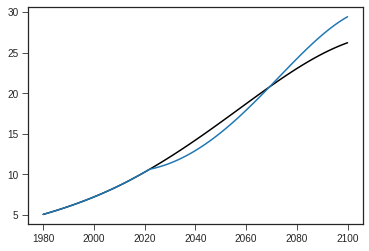

In [ ]:
plt.plot(df1['Years'],df1['emissions'],color='k')
plt.plot(D50p['Years'],D50p['emissions'])

In [ ]:
import io
with io.StringIO() as buffer:
  D75p['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.496434657136653
10.372115764425034
10.255507138837473
10.146537512433877
10.045134033050283
9.951222484166914
9.864727487221765
9.785572686798451
9.713680919135955
9.648974364422788
9.591374683349539
9.5408031384

# D50% (50% investment into LCE in 2022)

In [ ]:
#2023 values for decarbonisation scenario:
#=========================================

HCE_K_half=(HCE_K_2022+(Total_GWP_2022*0.5)-d_2022*HCE_K_2022) #High Carbon Economy capital in 2023 (T$)
LCE_K_half=(LCE_K_2022+(Total_GWP_2022*0.5)-d_2022*LCE_K_2022) #Low Carbon Economy capital in 2023 (T$)

HCE_GWP_half=HCE_K_half*A_HCE #High Carbon Economy GWP in 2023 (T$/yr)
LCE_GWP_half=LCE_K_half*A_LCE #Low Carbon Economy GWP in 2023 (T$/yr)
u_decarb_half=HCE_C_intensity_2022*HCE_GWP_half #total economy emissions in 2023 (GtC/yr)
delta_u_decarb_half=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2023 (GtC)
delta_t_decarb_half=clim_sens*delta_u_decarb_half #total economy temp change in 2023 (^c)
d_decarb_half=max(0.03,0.03+Sd*(delta_t_decarb_half-1)) #high carbon infrastructure decay rate (%/yr) in 2023
Total_GWP_half=HCE_GWP_half+LCE_GWP_half #total GWP in 2023 (T$/yr)

In [ ]:
#creating the list that the 2022, 2023 and eventually 2024-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_half=[] #empty list for HCE capital 
HCE_K_full_series_half.append(HCE_K_2022) #adding the 2022 value to the list
HCE_K_full_series_half.append(HCE_K_half) #adding the 2023 value to the list
print(HCE_K_full_series_half)

LCE_K_full_series_half=[] #empty list for LCE capital
LCE_K_full_series_half.append(LCE_K_2022) #adding the 2022 value to the list
LCE_K_full_series_half.append(LCE_K_half) #adding the 2023 value to the list
print(LCE_K_full_series_half)


#GWP series:
HCE_GWP_full_series_half=[] #empty list for HCE GWP
HCE_GWP_full_series_half.append(HCE_GWP_2022)
HCE_GWP_full_series_half.append(HCE_GWP_half)
print(HCE_GWP_full_series_half)

LCE_GWP_full_series_half=[] #empty list for LCE GWP
LCE_GWP_full_series_half.append(LCE_GWP_2022)
LCE_GWP_full_series_half.append(LCE_GWP_half)
print(LCE_GWP_full_series_half)

Total_GWP_full_series_half=[] #empty list for total economy GWP 
Total_GWP_full_series_half.append(Total_GWP_2022)
Total_GWP_full_series_half.append(Total_GWP_half)
print(Total_GWP_full_series_half)


#emissions series:
u_full_series_decarb_half=[] #empty list for total economy emissions
u_full_series_decarb_half.append(u_2022)
u_full_series_decarb_half.append(u_decarb_half)
print(u_full_series_decarb_half)


#cumulative emissions series:
delta_u_full_series_decarb_half=[] #empty list for cumulative emissions
delta_u_full_series_decarb_half.append(delta_u_2022) 
delta_u_full_series_decarb_half.append(delta_u_decarb_half)
print(delta_u_full_series_decarb_half)


#temperature change series:
delta_t_full_series_decarb_half=[] #empty list for total economy temp change 
delta_t_full_series_decarb_half.append(delta_t_2022)
delta_t_full_series_decarb_half.append(delta_t_decarb_half)
print(delta_t_full_series_decarb_half)


#high C infrastructure decay rate series:
d_full_series_decarb_half=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_half.append(d_2022)
d_full_series_decarb_half.append(d_decarb_half)
print(d_full_series_decarb_half)

[1241.3594746119652, 1249.2065089484224]
[310.3398686529913, 347.21486246056713]
[75.23390755224031, 75.70948539081348]
[17.868053043657074, 19.99115874772962]
[93.10196059589738, 95.70064413854311]
[10.62853326286016, 10.69571965581528]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 1.1793925627912467]
[0.031178676888570022, 0.03134544422093435]


In [ ]:
#go through loop for all variables to get from 2024 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2024-2100
  delta_u_decarb_half = delta_u_decarb_half+u_decarb_half+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_half = HCE_K_half+(Total_GWP_half*0.5)-d_decarb_half*HCE_K_half #HCE capital (T$) 
  LCE_K_half = LCE_K_half+(Total_GWP_half*0.5)-d_decarb_half*LCE_K_half #LCE capital (T$)
  HCE_GWP_half = A_HCE*HCE_K_half #HCE GWP (T$/yr)
  LCE_GWP_half = A_LCE*LCE_K_half #LCE GWP (T$/yr)
  Total_GWP_half = HCE_GWP_half+LCE_GWP_half #Total economy GWP (T$/yr)
  u_decarb_half = HCE_C_intensity_2022*HCE_GWP_half #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_half = clim_sens*delta_u_decarb_half # temp change (^C)
  d_decarb_half = max(0.03,0.03+Sd*(delta_t_decarb_half-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_half.append(delta_u_decarb_half) #adding the 2024-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_half.append(delta_t_decarb_half) #adding the temp change from 2024-2100
  HCE_K_full_series_half.append(HCE_K_half) #adding 2024-2100 HCE capital to the list
  LCE_K_full_series_half.append(LCE_K_half) #adding 2024-2100 LCE capital to the list
  HCE_GWP_full_series_half.append(HCE_GWP_half)
  LCE_GWP_full_series_half.append(LCE_GWP_half)
  Total_GWP_full_series_half.append(Total_GWP_half)
  u_full_series_decarb_half.append(u_decarb_half)
  d_full_series_decarb_half.append(d_decarb_half)

print(delta_u_full_series_decarb_half)
print(delta_t_full_series_decarb_half)
print(HCE_K_full_series_half)
print(LCE_K_full_series_half)
print(HCE_GWP_full_series_half)
print(LCE_GWP_full_series_half)
print(Total_GWP_full_series_half)
print(u_full_series_decarb_half)
print(d_full_series_decarb_half)

[631.1765009869107, 643.3050342497709, 655.5007539055862, 667.7709064531997, 680.122719878893, 692.5634018898121, 705.100138017672, 717.7400895806692, 730.4903914917504, 743.3581499016262, 756.350439665188, 769.4743016202855, 782.7367396681517, 796.1447176451287, 809.705155975749, 823.424928097672, 837.3108566494599, 851.369709412709, 865.6081950006358, 880.0329582858466, 894.6505755607095, 909.4675494244921, 924.4903033922319, 939.7251762211774, 955.1784159515662, 970.8561736595111, 986.7644969208321, 1002.9093229858106, 1019.2964716660572, 1035.9316379359643, 1052.820384252574, 1069.9681325991203, 1087.3801562590038, 1105.0615713285308, 1123.0173279783846, 1141.252201475502, 1159.7707829787948, 1178.5774701239748, 1197.6764574146177, 1217.0717264385178, 1236.7670359303413, 1256.7659117035755, 1277.0716364767693, 1297.6872396210838, 1318.615486858179, 1339.8588699394659, 1361.4195963397196, 1383.2995789999884, 1405.5004261565896, 1428.0234312948007, 1450.8695632675453, 1474.0394566209

In [ ]:
df11= pd.DataFrame()

df11['Years']=years_full_decarb
df11['HCE capital']=HCE_K_full_series_half
df11['HCE GWP']=HCE_GWP_full_series_half
df11['HCE GWP growth rate']=df11['HCE GWP'].pct_change()
df11['LCE capital']=LCE_K_full_series_half
df11['LCE GWP']=LCE_GWP_full_series_half
df11['LCE GWP growth rate']=df11['LCE GWP'].pct_change()
df11['emissions']=u_full_series_decarb_half
df11['cumulative_emissions']=delta_u_full_series_decarb_half
df11['temp_change']=delta_t_full_series_decarb_half
df11['decay_rate']=d_full_series_decarb_half
df11['capital']=df11['HCE capital']+df11['LCE capital']
df11['GWP']=Total_GWP_full_series_half
df11['total_GWP_growth_rate']=df11['GWP'].pct_change()

df11

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2022,1241.359475,75.233908,NaN,310.339869,17.868053,NaN,10.628533,631.176501,1.157157,0.031179,1551.699343,93.101961,NaN
1,2023,1249.206509,75.709485,0.006321,347.214862,19.991159,0.118821,10.695720,643.305034,1.179393,0.031345,1596.421371,95.700644,0.027912
2,2024,1257.899898,76.236357,0.006959,384.181580,22.119546,0.106466,10.770153,655.500754,1.201751,0.031513,1642.081478,98.355903,0.027745
3,2025,1267.437480,76.814393,0.007582,421.252766,24.253947,0.096494,10.851813,667.770906,1.224247,0.031682,1688.690246,101.068340,0.027578
4,2026,1277.816886,77.443448,0.008189,458.440869,26.395080,0.088280,10.940682,680.122720,1.246892,0.031852,1736.257754,103.838528,0.027409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,3344.269942,202.683027,0.007803,3296.934923,189.823526,0.008698,28.633675,2092.135046,3.835581,0.051267,6641.204864,392.506553,0.008235
75,2097,3369.073009,204.186243,0.007417,3324.164708,191.391301,0.008259,28.846040,2122.268722,3.890826,0.051681,6693.237718,395.577544,0.007824
76,2098,3392.744063,205.620852,0.007026,3350.156676,192.887809,0.007819,29.048711,2152.614762,3.946460,0.052098,6742.900739,398.508661,0.007410
77,2099,3415.241676,206.984344,0.006631,3374.873027,194.310871,0.007378,29.241336,2183.163473,4.002466,0.052518,6790.114703,401.295215,0.006992


In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D50% dataframe (df11)

dfD50p = [df3, df11]

D50p = pd.concat(dfD50p)
display(D50p)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,6641.204864,392.506553,28.633675,2092.135046,3.835581,0.051267,0.008235,3344.269942,202.683027,0.007803,3296.934923,189.823526,0.008698
75,2097,6693.237718,395.577544,28.846040,2122.268722,3.890826,0.051681,0.007824,3369.073009,204.186243,0.007417,3324.164708,191.391301,0.008259
76,2098,6742.900739,398.508661,29.048711,2152.614762,3.946460,0.052098,0.007410,3392.744063,205.620852,0.007026,3350.156676,192.887809,0.007819
77,2099,6790.114703,401.295215,29.241336,2183.163473,4.002466,0.052518,0.006992,3415.241676,206.984344,0.006631,3374.873027,194.310871,0.007378


In [ ]:
import io
with io.StringIO() as buffer:
  D50p['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())

emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.69571965581528
10.77015254761355
10.85181342569326
10.940682010919081
11.03673612785989
11.139951562997238
11.25030191108125
11.36775840987577
11.492289763561745
11.62386195509747
11.762438047866267
11.9079779769

# Plots

Text(0.5, 1.0, 'Gross World Product (GWP)')

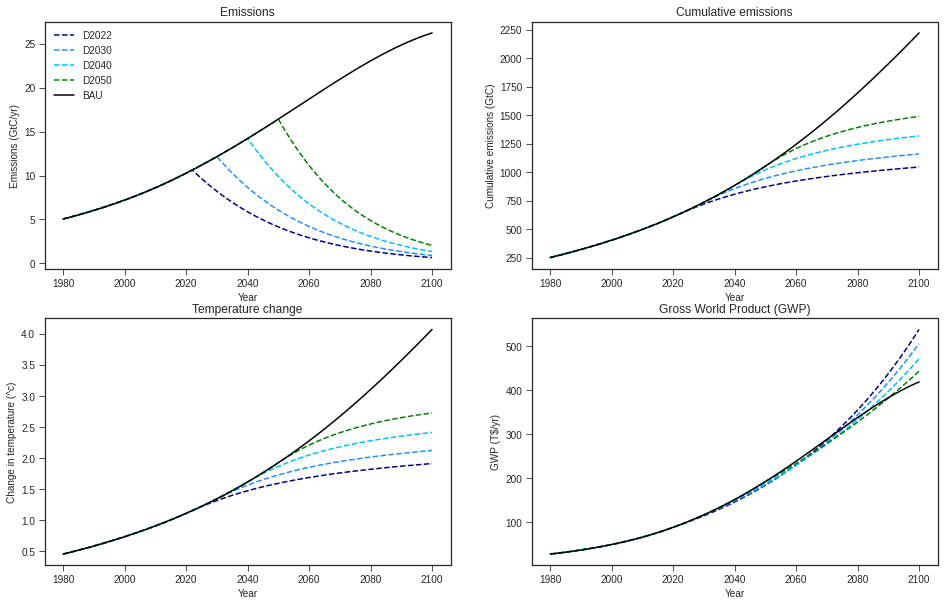

In [ ]:
#PLOTS FOR DELAYED DECARB SCENARIO:
#==========================
fig=(plt.figure(figsize=[16,10]))

#plot of years vs. emissions following BAU + Decarbonised scenario
#==========-======================================================
ax1=fig.add_subplot(221)
ax1.plot(D2022['Years'],D2022['emissions'],color='navy',label='D2022',linestyle='dashed')
ax1.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',label='D2030',linestyle='dashed')
ax1.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',label='D2040',linestyle='dashed')
ax1.plot(D2050['Years'],D2050['emissions'],color='green',label='D2050',linestyle='dashed')
ax1.plot(df1['Years'],df1['emissions'],color='black',label='BAU')
ax1.set_ylabel('Emissions (GtC/yr)')
ax1.set_xlabel('Year')
ax1.set_title('Emissions')
ax1.legend(loc='best')

#plot of years vs. cumulative emissions following BAU + Decarbonised scenario
#==========-=================================================================
ax2=fig.add_subplot(222)
ax2.plot(D2022['Years'],D2022['cumulative_emissions'],color='navy',linestyle='dashed')
ax2.plot(D2030['Years'],D2030['cumulative_emissions'],color='dodgerblue',linestyle='dashed')
ax2.plot(D2040['Years'],D2040['cumulative_emissions'],color='deepskyblue',linestyle='dashed')
ax2.plot(D2050['Years'],D2050['cumulative_emissions'],color='green',linestyle='dashed')
ax2.plot(df1['Years'],df1['cumulative_emissions'],color='black')
ax2.set_ylabel('Cumulative emissions (GtC)')
ax2.set_xlabel('Year')
ax2.set_title('Cumulative emissions')

#plot of years vs. temperature change following BAU + Decarbonised scenario
#==========================================================================
ax3=fig.add_subplot(223)
ax3.plot(D2022['Years'],D2022['temp_change'],color='navy',linestyle='dashed')
ax3.plot(D2030['Years'],D2030['temp_change'],color='dodgerblue',linestyle='dashed')
ax3.plot(D2040['Years'],D2040['temp_change'],color='deepskyblue',linestyle='dashed')
ax3.plot(D2050['Years'],D2050['temp_change'],color='green',linestyle='dashed')
ax3.plot(df1['Years'],df1['temp_change'],color='black')
ax3.set_ylabel('Change in temperature (^c)')
ax3.set_xlabel('Year')
ax3.set_title('Temperature change')

#plot of years vs. GWP following BAU + Decarbonised scenario
#===========================================================
ax4=fig.add_subplot(224)
ax4.plot(D2022['Years'],D2022['GWP'],color='navy',linestyle='dashed')
ax4.plot(D2030['Years'],D2030['GWP'],color='dodgerblue',linestyle='dashed')
ax4.plot(D2040['Years'],D2040['GWP'],color='deepskyblue',linestyle='dashed')
ax4.plot(D2050['Years'],D2050['GWP'],color='green',linestyle='dashed')
ax4.plot(df1['Years'],df1['GWP'],color='black')
ax4.set_ylabel('GWP (T$/yr)')
ax4.set_xlabel('Year')
ax4.set_title('Gross World Product (GWP)')

Text(1955, 1500, 'Cumulative emissions (GtC)')

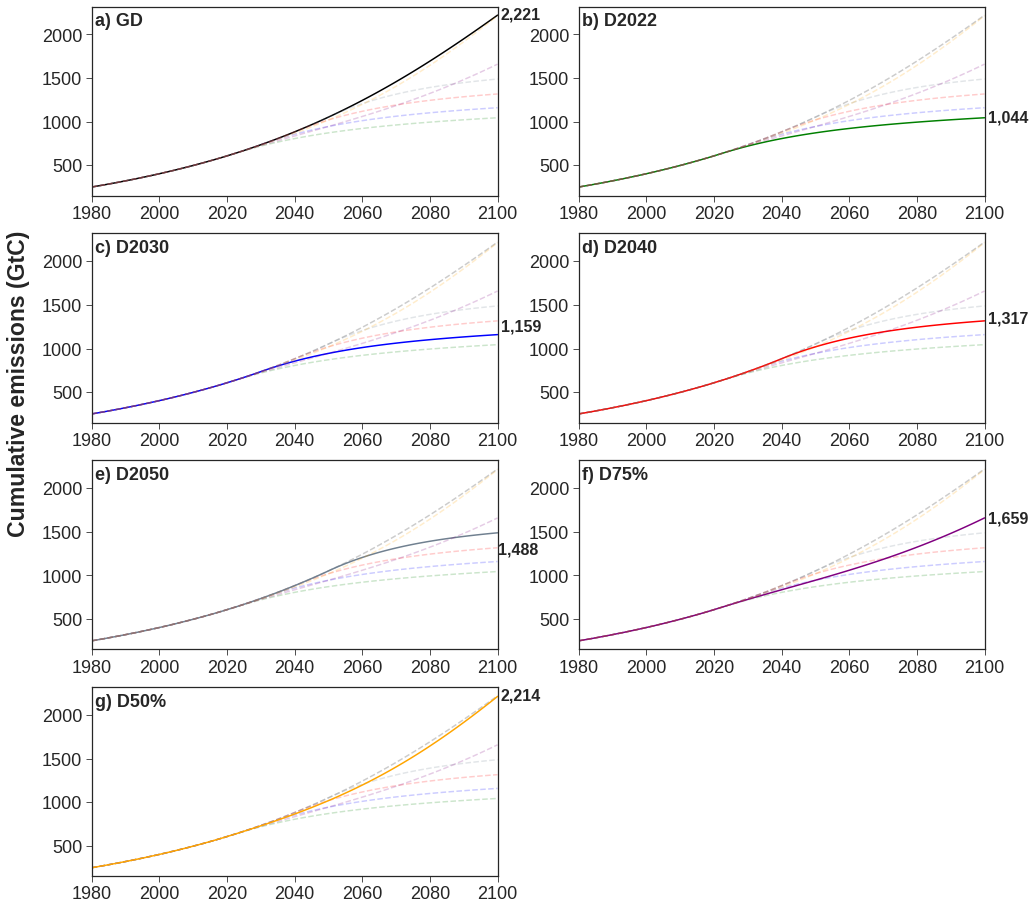

In [ ]:
#plots of just cumulative emissions for each SIAM scenario

fig = plt.figure(figsize=[16,16])
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax7.tick_params(axis='both', which='major', labelsize=18)

ax1.plot(df1['Years'],df1['cumulative_emissions'],color='k')
ax1.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax1.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax1.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax1.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax1.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax1.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax1.set_xlim(1980,2100)
ax1.text(1981,2100,'a) GD',fontsize='18',weight='bold')
ax1.text(2101,2180,'2,221',weight='bold',fontsize=16)

ax2.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax2.plot(D2022['Years'],D2022['cumulative_emissions'],color='green')
ax2.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax2.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax2.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax2.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax2.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax2.set_xlim(1980,2100)
ax2.text(1981,2100,'b) D2022',fontsize='18',weight='bold')
ax2.text(2101,1000,'1,044',weight='bold',fontsize=16)

ax3.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax3.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax3.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue')
ax3.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax3.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax3.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax3.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax3.set_xlim(1980,2100)
ax3.text(1981,2100,'c) D2030',fontsize='18',weight='bold')
ax3.text(2101,1200,'1,159',weight='bold',fontsize=16)

ax4.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax4.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax4.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax4.plot(D2040['Years'],D2040['cumulative_emissions'],color='red')
ax4.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax4.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax4.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax4.set_xlim(1980,2100)
ax4.text(1981,2100,'d) D2040',fontsize='18',weight='bold')
ax4.text(2101,1300,'1,317',weight='bold',fontsize=16)

ax5.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax5.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax5.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax5.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax5.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey')
ax5.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax5.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax5.set_xlim(1980,2100)
ax5.text(1981,2100,'e) D2050',fontsize='18',weight='bold')
ax5.text(2100,1250,'1,488',weight='bold',fontsize=16)

ax6.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax6.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax6.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax6.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax6.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax6.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple')
ax6.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange',linestyle='dashed',alpha=0.2)
ax6.set_xlim(1980,2100)
ax6.text(1981,2100,'f) D75%',fontsize='18',weight='bold')
ax6.text(2101,1600,'1,659',weight='bold',fontsize=16)

ax7.plot(df1['Years'],df1['cumulative_emissions'],color='k',linestyle='dashed',alpha=0.2)
ax7.plot(D2022['Years'],D2022['cumulative_emissions'],color='green',linestyle='dashed',alpha=0.2)
ax7.plot(D2030['Years'],D2030['cumulative_emissions'],color='blue',linestyle='dashed',alpha=0.2)
ax7.plot(D2040['Years'],D2040['cumulative_emissions'],color='red',linestyle='dashed',alpha=0.2)
ax7.plot(D2050['Years'],D2050['cumulative_emissions'],color='slategrey',linestyle='dashed',alpha=0.2)
ax7.plot(D75p['Years'],D75p['cumulative_emissions'],color='purple',linestyle='dashed',alpha=0.2)
ax7.plot(D50p['Years'],D50p['cumulative_emissions'],color='orange')
ax7.set_xlim(1980,2100)
ax7.text(1981,2100,'g) D50%',fontsize='18',weight='bold')
ax7.text(2101,2180,'2,214',weight='bold',fontsize=16)

ax5.text(1955,1500,'Cumulative emissions (GtC)',weight='bold',fontsize=23,rotation=90)


<Figure size 432x288 with 0 Axes>

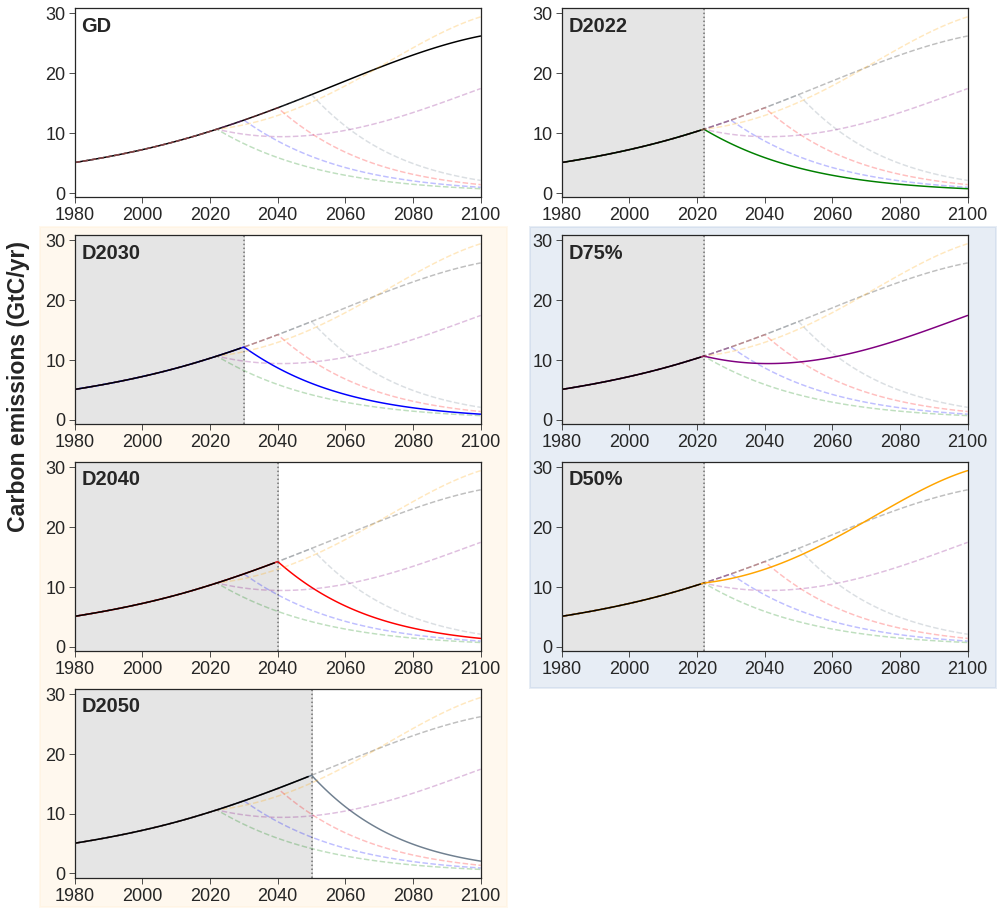

In [ ]:
#plots of just emissions for each SIAM scenario

plt.suptitle('SIAM emissions scenarios',horizontalalignment='center', y=1.03,fontsize=20,weight='bold')

fig = plt.figure(figsize=[16,16])
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax7.tick_params(axis='both', which='major', labelsize=18)

ax1.plot(df1['Years'],df1['emissions'],color='k')
ax1.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax1.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax1.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax1.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax1.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax1.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
#ax1.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax1.set_xlim(1980,2100)
ax1.text(1982,27,'GD',fontsize='20',weight='bold')

ax2.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax2.plot(D2022['Years'],D2022['emissions'],color='green')
ax2.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax2.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax2.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax2.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax2.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
ax2.plot(df3['Years'],df3['emissions'],color='k')
#ax2.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax2.set_xlim(1980,2100)
ax2.text(1982,27,'D2022',fontsize='20',weight='bold')
ax2.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax2.axvspan(1980,2022, color='grey',alpha=0.2)

ax3.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax3.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax3.plot(D2030['Years'],D2030['emissions'],color='blue')
ax3.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax3.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax3.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax3.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
ax3.plot(df5['Years'],df5['emissions'],color='k')
#ax3.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax3.set_xlim(1980,2100)
ax3.text(1982,27,'D2030',fontsize='20',weight='bold')
ax3.axvline(x=2030,alpha=0.5,color='k',linestyle='dotted')
ax3.axvspan(1980,2030, color='grey',alpha=0.2)
ax3.set_zorder(10)

ax4.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax4.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax4.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax4.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax4.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax4.plot(D75p['Years'],D75p['emissions'],color='purple')
ax4.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
ax4.plot(df3['Years'],df3['emissions'],color='k')
#ax6.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax4.set_xlim(1980,2100)
ax4.text(1982,27,'D75%',fontsize='20',weight='bold')
ax4.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax4.axvspan(1980,2022, color='grey',alpha=0.2)
ax4.set_zorder(10)

ax5.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax5.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax5.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax5.plot(D2040['Years'],D2040['emissions'],color='red')
ax5.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax5.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax5.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
ax5.plot(df7['Years'],df7['emissions'],color='k')
#ax4.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax5.set_xlim(1980,2100)
ax5.text(1982,27,'D2040',fontsize='20',weight='bold')
ax5.axvline(x=2040,alpha=0.5,color='k',linestyle='dotted')
ax5.axvspan(1980,2040, color='grey',alpha=0.2)
ax5.set_zorder(10)

ax6.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax6.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax6.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax6.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax6.plot(D2050['Years'],D2050['emissions'],color='slategrey',linestyle='dashed',alpha=0.25)
ax6.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax6.plot(D50p['Years'],D50p['emissions'],color='orange')
ax6.plot(df3['Years'],df3['emissions'],color='k')
#ax7.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax6.set_xlim(1980,2100)
ax6.text(1982,27,'D50%',fontsize='20',weight='bold')
ax6.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax6.axvspan(1980,2022, color='grey',alpha=0.2)
ax6.set_zorder(10)

ax7.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax7.plot(D2022['Years'],D2022['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax7.plot(D2030['Years'],D2030['emissions'],color='blue',linestyle='dashed',alpha=0.25)
ax7.plot(D2040['Years'],D2040['emissions'],color='red',linestyle='dashed',alpha=0.25)
ax7.plot(D2050['Years'],D2050['emissions'],color='slategrey')
ax7.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax7.plot(D50p['Years'],D50p['emissions'],color='orange',linestyle='dashed',alpha=0.25)
ax7.plot(df9['Years'],df9['emissions'],color='k')
#ax5.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax7.set_xlim(1980,2100)
ax7.text(1982,27,'D2050',fontsize='20',weight='bold')
ax7.axvline(x=2050,alpha=0.5,color='k',linestyle='dotted')
ax7.axvspan(1980,2050, color='grey',alpha=0.2)
ax7.set_zorder(10)

#y label
ax5.text(1960,20,'Carbon emissions (GtC/yr)',weight='bold',fontsize=23,rotation=90)

#boxed shading (delayed decarb)
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.095, 0.1), 0.405, 0.59, fill=True, color="papayawhip", alpha=0.4, lw=2, 
    zorder=0, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])


#boxed shading (percentage decarb)
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.52, 0.29), 0.405, 0.4, fill=True, color="lightsteelblue", alpha=0.3, lw=2, 
    zorder=0, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])


In [ ]:
import io
with io.StringIO() as buffer:
  D50p['emissions'].to_csv(buffer, sep=' ',index=False)
  print(buffer.getvalue())


emissions
5.057271839089452
5.147764058538205
5.239875499187896
5.333635134549325
5.429072456570384
5.5262174849127
5.625100776394277
5.725753434601091
5.8282071196706795
5.932494058250785
6.038647053636199
6.146699496086988
6.256685373331346
6.368639281256383
6.4825964347902065
6.598592678978723
6.716664500260647
6.836849037944242
6.959184095889443
7.0837081543989955
7.210460382322382
7.3394806493763145
7.470809538685697
7.6044883595489825
7.740559160431952
7.87906474219399
8.020048671551033
8.163555294779407
8.309629751664882
8.458317989701326
8.609666778543414
8.763723724717947
8.920537286598417
9.080156789647514
9.242632441932363
9.408015349917411
9.5760090657446
9.74613776298193
9.918395264355935
10.092773811213535
10.269264008636307
10.44785477025664
10.62853326286016
10.69571965581528
10.77015254761355
10.85181342569326
10.940682010919081
11.03673612785989
11.139951562997238
11.25030191108125
11.36775840987577
11.492289763561745
11.62386195509747
11.762438047866267
11.9079779769

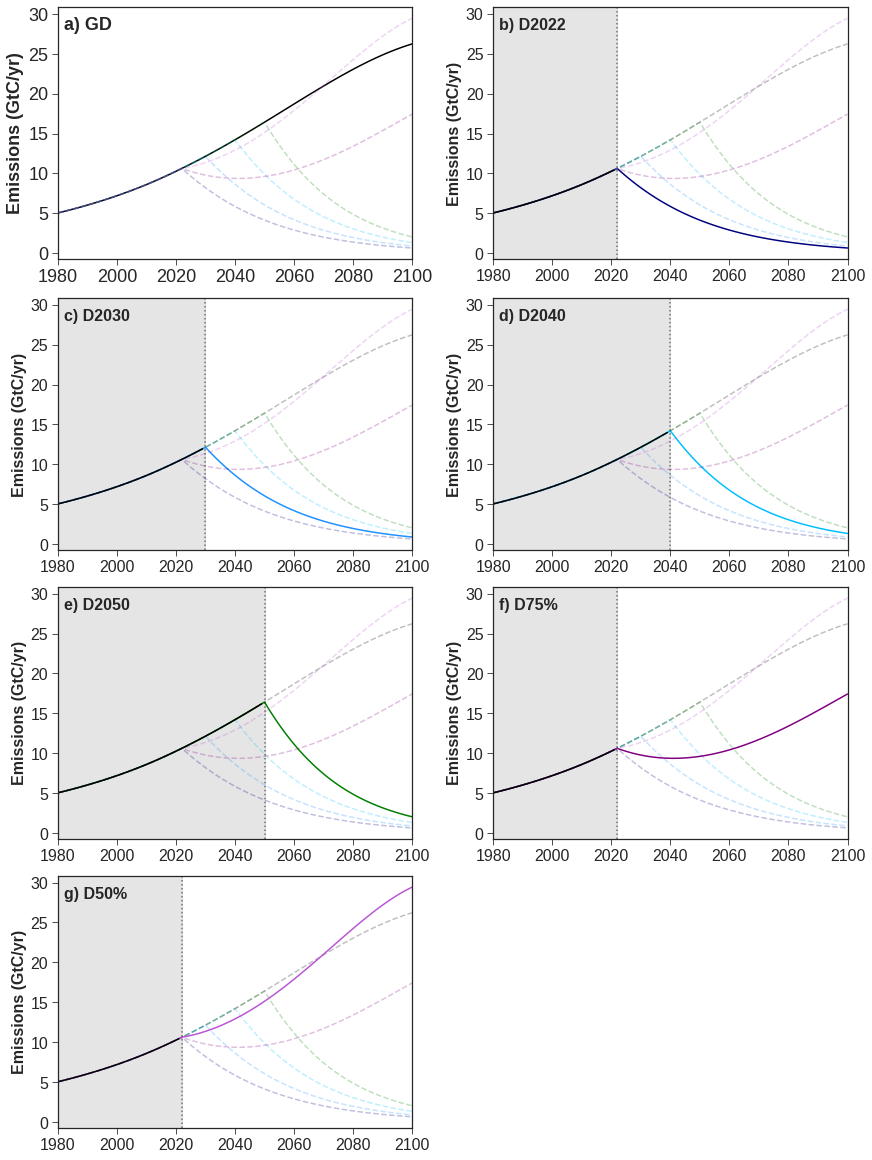

In [ ]:
#plots of just emissions for each SIAM scenario

fig = plt.figure(figsize=[12,16], constrained_layout=True)
spec = fig.add_gridspec(4,2)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 0])
ax6 = fig.add_subplot(spec[2, 1])
ax7 = fig.add_subplot(spec[3, 0])

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax4.tick_params(axis='both', which='major', labelsize=16)
ax5.tick_params(axis='both', which='major', labelsize=16)
ax6.tick_params(axis='both', which='major', labelsize=16)
ax7.tick_params(axis='both', which='major', labelsize=16)

ax1.plot(df1['Years'],df1['emissions'],color='k')
ax1.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax1.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax1.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax1.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax1.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax1.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax1.set_ylabel('Emissions (GtC/yr)',fontsize=18,weight='bold')
ax1.set_xlim(1980,2100)
ax1.text(1982,28,'a) GD',fontsize='18',weight='bold')

ax2.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax2.plot(D2022['Years'],D2022['emissions'],color='navy')
ax2.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax2.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax2.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax2.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax2.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax2.plot(df3['Years'],df3['emissions'],color='k')
ax2.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax2.set_xlim(1980,2100)
ax2.text(1982,28,'b) D2022',fontsize='16',weight='bold')
ax2.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax2.axvspan(1980,2022, color='grey',alpha=0.2)

ax3.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax3.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax3.plot(D2030['Years'],D2030['emissions'],color='dodgerblue')
ax3.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax3.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax3.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax3.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax3.plot(df5['Years'],df5['emissions'],color='k')
ax3.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax3.set_xlim(1980,2100)
ax3.text(1982,28,'c) D2030',fontsize='16',weight='bold')
ax3.axvline(x=2030,alpha=0.5,color='k',linestyle='dotted')
ax3.axvspan(1980,2030, color='grey',alpha=0.2)

ax4.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax4.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax4.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax4.plot(D2040['Years'],D2040['emissions'],color='deepskyblue')
ax4.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax4.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax4.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax4.plot(df7['Years'],df7['emissions'],color='k')
ax4.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax4.set_xlim(1980,2100)
ax4.text(1982,28,'d) D2040',fontsize='16',weight='bold')
ax4.axvline(x=2040,alpha=0.5,color='k',linestyle='dotted')
ax4.axvspan(1980,2040, color='grey',alpha=0.2)

ax5.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax5.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax5.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax5.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax5.plot(D2050['Years'],D2050['emissions'],color='green')
ax5.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax5.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax5.plot(df9['Years'],df9['emissions'],color='k')
ax5.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax5.set_xlim(1980,2100)
ax5.text(1982,28,'e) D2050',fontsize='16',weight='bold')
ax5.axvline(x=2050,alpha=0.5,color='k',linestyle='dotted')
ax5.axvspan(1980,2050, color='grey',alpha=0.2)

ax6.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax6.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax6.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax6.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax6.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax6.plot(D75p['Years'],D75p['emissions'],color='purple')
ax6.plot(D50p['Years'],D50p['emissions'],color='mediumorchid',linestyle='dashed',alpha=0.25)
ax6.plot(df3['Years'],df3['emissions'],color='k')
ax6.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax6.set_xlim(1980,2100)
ax6.text(1982,28,'f) D75%',fontsize='16',weight='bold')
ax6.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax6.axvspan(1980,2022, color='grey',alpha=0.2)

ax7.plot(df1['Years'],df1['emissions'],color='k',linestyle='dashed',alpha=0.25)
ax7.plot(D2022['Years'],D2022['emissions'],color='navy',linestyle='dashed',alpha=0.25)
ax7.plot(D2030['Years'],D2030['emissions'],color='dodgerblue',linestyle='dashed',alpha=0.25)
ax7.plot(D2040['Years'],D2040['emissions'],color='deepskyblue',linestyle='dashed',alpha=0.25)
ax7.plot(D2050['Years'],D2050['emissions'],color='green',linestyle='dashed',alpha=0.25)
ax7.plot(D75p['Years'],D75p['emissions'],color='purple',linestyle='dashed',alpha=0.25)
ax7.plot(D50p['Years'],D50p['emissions'],color='mediumorchid')
ax7.plot(df3['Years'],df3['emissions'],color='k')
ax7.set_ylabel('Emissions (GtC/yr)',fontsize=16,weight='bold')
ax7.set_xlim(1980,2100)
ax7.text(1982,28,'g) D50%',fontsize='16',weight='bold')
ax7.axvline(x=2022,alpha=0.5,color='k',linestyle='dotted')
ax7.axvspan(1980,2022, color='grey',alpha=0.2)




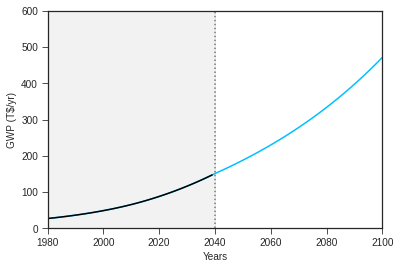

In [ ]:
#plots for emissions series:
#===========================
plt.plot(D2040['Years'],D2040['GWP'],color='deepskyblue')
plt.plot(df7['Years'],df7['GWP'],color='k')
plt.ylim(0,600)
plt.xlabel('Years')
plt.ylabel('GWP (T$/yr)')
plt.axvline(x=2040,linestyle='dotted',color='k',alpha=0.5)
plt.xlim(1980,2100)
plt.axvspan(1980,2040, color='grey',alpha=0.1)